Nguyen Nguyet Han - Credit Scoring Assignment

In [1]:
# Data exploration
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

# Data processing
import pickle
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Experimental setup
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV, train_test_split
from imblearn.pipeline import Pipeline
from sklearn.metrics import *
from sklearn.model_selection import learning_curve
from collections import defaultdict

pd.set_option('display.max_columns', None)

In [2]:
###################################################################
# MODIFY THESE FLAGS TO TURN ON/OFF THE DATA PROCESSING FUNCTIONS #
###################################################################

# Flag variables to run the data processing steps
# Value representation step
enable_repr_dummy = True  # Represent cat variables - Dummy coding
drop_cat_vars = True  # Drop cat variables after value representation step
# Other data processing
enable_normalize = True  # Normalize the data to the same range [0, 1]

## 1. Data summary

#### (a)  Read and print out some data

In [3]:
# Read dataset
accepts = pd.read_csv("./Assignment2022_Data/RealEstateLoans_accepts.csv")
rejects = pd.read_csv("./Assignment2022_Data/RealEstateLoans_rejects.csv")

In [4]:
accepts.shape

(18549, 29)

In [5]:
accepts.head()

total_income  loan_amount  term  interest_rate own_car own_house  \
0      157500.0     288562.5    30       3.737395       Y         N   
1       76500.0     225000.0    48       3.654300       N         Y   
2       67500.0     409653.0    12       3.262865       Y         N   
3      180000.0     328405.5    24       4.773736       Y         N   
4      130500.0    1225224.0    60       2.867961       N         N   

   nr_children           income_type                 education_type  \
0            0  Commercial associate  Secondary / secondary special   
1            3               Working  Secondary / secondary special   
2            0               Working  Secondary / secondary special   
3            1               Working  Secondary / secondary special   
4            0             Pensioner  Secondary / secondary special   

    family_status housing_type  region_population_ratio  days_birth  \
0         Married    Apartment                 0.025164      -11966   
1       Separated  Co-op house                 0.028663      -10461   
2  Civil marriage        House                 0.035792      -11130   
3       Separated        House                 0.020713      -13525   
4         Married  Rented room                 0.007305      -20386   

   days_employed  days_registration  mobile_number  phone_number  email  \
0           -229             -979.0              1             0      0   
1          -2371            -1050.0              1             0      0   
2          -1188            -4868.0              1             0      0   
3          -5090            -2064.0              1             0      0   
4         365243            -1731.0              1             0      0   

   days_phone_change occupation_type  family_count      EXT1      EXT2  \
0                0.0         Drivers           2.0       NaN  0.541308   
1            -2547.0        Laborers           4.0       NaN  0.395423   
2            -1502.0        Laborers           2.0       NaN  0.649417   
3            -1611.0        Laborers           2.0  0.512811  0.337838   
4            -1181.0             NaN           2.0  0.595440  0.537174   

       EXT3  EXT4  EXT5  EXT6  EXT7  Default  
0  0.236611     0     0     0     0        0  
1  0.673830     0     1     0     0        0  
2  0.042929     0     1     0     0        1  
3  0.852828     0     1     0     0        0  
4  0.367291     0     0     0     0        0

In [6]:
accepts.describe()

total_income   loan_amount          term  interest_rate   nr_children  \
count  1.854900e+04  1.854900e+04  18549.000000   18549.000000  18549.000000   
mean   1.689246e+05  6.254865e+05     31.553938       3.357800      0.407300   
std    9.984041e+04  4.031977e+05     15.660557       0.603831      0.717471   
min    2.655000e+04  4.500000e+04     12.000000       0.607395      0.000000   
25%    1.125000e+05  2.956680e+05     18.000000       2.991659      0.000000   
50%    1.575000e+05  5.400000e+05     30.000000       3.401064      0.000000   
75%    2.025000e+05  8.356050e+05     42.000000       3.777666      1.000000   
max    3.600000e+06  4.050000e+06     60.000000       5.350335     10.000000   

       region_population_ratio    days_birth  days_employed  \
count             18549.000000  18549.000000   18549.000000   
mean                  0.020854 -16092.768667   66052.318939   
std                   0.013785   4338.035246  143162.610715   
min                   0.000533 -25184.000000  -17170.000000   
25%                   0.010006 -19734.000000   -2814.000000   
50%                   0.018850 -15786.000000   -1233.000000   
75%                   0.028663 -12483.000000    -272.000000   
max                   0.072508  -7691.000000  365243.000000   

       days_registration  mobile_number  phone_number         email  \
count       18549.000000        18549.0  18549.000000  18549.000000   
mean        -5012.563642            1.0      0.283843      0.059195   
std          3521.844669            0.0      0.450874      0.235995   
min        -19513.000000            1.0      0.000000      0.000000   
25%         -7496.000000            1.0      0.000000      0.000000   
50%         -4555.000000            1.0      0.000000      0.000000   
75%         -2026.000000            1.0      1.000000      0.000000   
max             0.000000            1.0      1.000000      1.000000   

       days_phone_change  family_count         EXT1          EXT2  \
count       18549.000000  18549.000000  8134.000000  18516.000000   
mean         -979.131867      2.145992     0.501452      0.512938   
std           832.280017      0.905339     0.210804      0.192903   
min         -4173.000000      1.000000     0.019207      0.000012   
25%         -1593.000000      2.000000     0.334737      0.389382   
50%          -789.000000      2.000000     0.505589      0.565174   
75%          -281.000000      3.000000     0.673512      0.664590   
max             0.000000     12.000000     0.941433      0.855000   

               EXT3          EXT4          EXT5          EXT6          EXT7  \
count  14909.000000  18549.000000  18549.000000  18549.000000  18549.000000   
mean       0.508383      0.000054      0.781983      0.000054      0.014826   
std        0.195038      0.007342      0.412910      0.007342      0.120858   
min        0.000527      0.000000      0.000000      0.000000      0.000000   
25%        0.368969      0.000000      1.000000      0.000000      0.000000   
50%        0.531686      0.000000      1.000000      0.000000      0.000000   
75%        0.665855      0.000000      1.000000      0.000000      0.000000   
max        0.887664      1.000000      1.000000      1.000000      1.000000   

            Default  
count  18549.000000  
mean       0.085449  
std        0.279557  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [7]:
accepts.isna().sum()

total_income                   0
loan_amount                    0
term                           0
interest_rate                  0
own_car                        0
own_house                      0
nr_children                    0
income_type                    0
education_type                 0
family_status                  0
housing_type                   0
region_population_ratio        0
days_birth                     0
days_employed                  0
days_registration              0
mobile_number                  0
phone_number                   0
email                          0
days_phone_change              0
occupation_type             5922
family_count                   0
EXT1                       10415
EXT2                          33
EXT3                        3640
EXT4                           0
EXT5                           0
EXT6                           0
EXT7                           0
Default                        0
dtype: int64

In [8]:
rejects.isna().sum()

total_income                  0
loan_amount                   0
term                          0
interest_rate                 0
own_car                       0
own_house                     0
nr_children                   0
income_type                   0
education_type                0
family_status                 0
housing_type                  0
region_population_ratio       0
days_birth                    0
days_employed                 0
days_registration             0
mobile_number                 0
phone_number                  0
email                         0
days_phone_change             0
occupation_type            2751
family_count                  0
EXT1                       5273
EXT2                         16
EXT3                       1812
EXT4                          0
EXT5                          0
EXT6                          0
EXT7                          0
dtype: int64

#### (b) Exploratory data analysis

In [9]:
# Copy data
accepts_eda = accepts.copy()

In [10]:
#Fill NA with missing
accepts_eda['occupation_type'] = accepts_eda['occupation_type'].fillna('Missing')

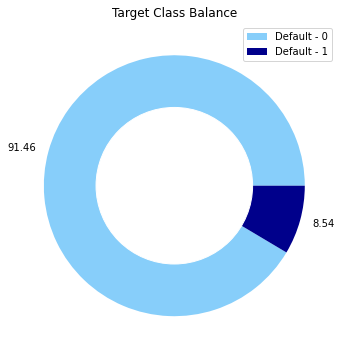

In [11]:
# Target class balance
fig, ax = plt.subplots(figsize=(6, 6))
labels = ["Default - 0", "Default - 1"]
color_list = ['lightskyblue', 'darkblue']
text = f'Total\n{len(accepts_eda)}'
title = 'Target Class Balance'

# Visualizing it through a donut chart
total = accepts_eda.shape[0]
data = np.array([accepts_eda[accepts_eda.Default == 0].shape[0], accepts_eda[accepts_eda.Default == 1].shape[0]])
data_per = data / total*100
plt.pie(data_per, colors=color_list, labels = [round(i,2) for i in (list(data_per))])
circle = plt.Circle((0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title(title)
plt.legend(labels)
plt.show()

According to the donut chart, the accepts dataset has:
- 16964 non-default customers, accounting for 91.46% total customers. 
- The number of default customers is 1585, only represents for 8.54% all the customers.

##### Numerical features

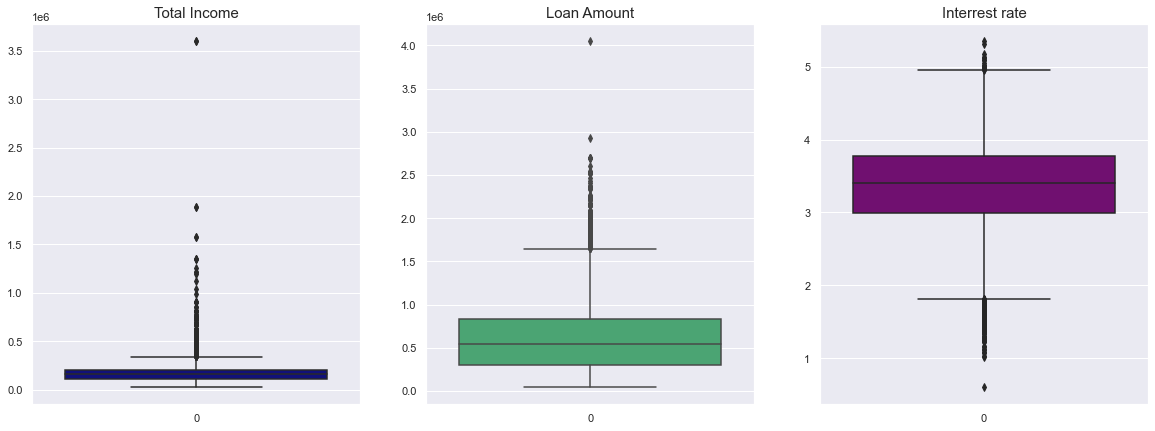

In [12]:
sns.set_theme()
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,7))
sns.boxplot(ax=ax0, data=accepts_eda['total_income'], color='darkblue')
sns.boxplot(ax=ax1, data=accepts_eda['loan_amount'], color = 'mediumseagreen')
sns.boxplot(ax=ax2, data=accepts_eda['interest_rate'], color = 'purple')
ax0.set_title('Total Income', fontsize = 15)
ax1.set_title('Loan Amount', fontsize = 15)
ax2.set_title('Interrest rate', fontsize = 15)
plt.show()

Regarding box plot graphs:
- The income of the customers ranges between 112.5 thousands and 202.5 thousands. The median of the income is 157,5 thousands. There is one client with total income equals 3,6 million. 
- The amount of loan varies from 45 thousands to more than 1.65 million with one extreme outliers at 4 million.
- The interest rate is between 1% and 6%, with most observations line in 3 to 4 % 

The days of employed of pensioner is defined at 365243 days. To easily plot the histogram, 1 is replaced for these observations.

In [13]:
# Change days of employed for pensioner
accepts_eda['days_employed'][accepts_eda.days_employed == 365243] = 1
accepts_eda[accepts_eda.days_employed == 1]

total_income  loan_amount  term  interest_rate own_car own_house  \
4          130500.0    1225224.0    60       2.867961       N         N   
7          189000.0     544491.0    42       4.090489       Y         N   
14          58500.0     269550.0    30       3.878817       N         Y   
15         292500.0     495891.0    36       3.536423       N         Y   
21         198000.0     254700.0    12       4.442210       N         Y   
...             ...          ...   ...            ...     ...       ...   
18529       90000.0     508495.5    18       3.151722       Y         N   
18532       99000.0     254700.0    24       2.745879       N         Y   
18538      135000.0     176328.0    18       4.360905       N         Y   
18540      202500.0     640705.5    18       4.000301       N         Y   
18541      135000.0     792162.0    60       4.329277       N         Y   

       nr_children income_type                 education_type  \
4                0   Pensioner  Secondary / secondary special   
7                2   Pensioner  Secondary / secondary special   
14               0   Pensioner              Incomplete higher   
15               0   Pensioner               Higher education   
21               0   Pensioner  Secondary / secondary special   
...            ...         ...                            ...   
18529            0   Pensioner  Secondary / secondary special   
18532            0   Pensioner  Secondary / secondary special   
18538            0   Pensioner  Secondary / secondary special   
18540            0   Pensioner  Secondary / secondary special   
18541            0   Pensioner  Secondary / secondary special   

              family_status         housing_type  region_population_ratio  \
4                   Married          Rented room                 0.007305   
7                   Married  Municipal apartment                 0.007114   
14           Civil marriage          Co-op house                 0.009630   
15                  Married                House                 0.072508   
21     Single / not married          Rented room                 0.035792   
...                     ...                  ...                      ...   
18529             Separated          Co-op house                 0.026392   
18532                 Widow          Rented room                 0.019101   
18538                 Widow        Rented studio                 0.010147   
18540               Married                House                 0.025164   
18541               Married                House                 0.035792   

       days_birth  days_employed  days_registration  mobile_number  \
4          -20386              1            -1731.0              1   
7          -15410              1            -6788.0              1   
14         -23420              1             -962.0              1   
15         -22008              1           -10401.0              1   
21         -23889              1            -6911.0              1   
...           ...            ...                ...            ...   
18529      -18741              1            -3650.0              1   
18532      -24416              1            -7945.0              1   
18538      -24078              1            -7030.0              1   
18540      -22113              1            -5768.0              1   
18541      -21198              1            -2003.0              1   

       phone_number  email  days_phone_change occupation_type  family_count  \
4                 0      0            -1181.0         Missing           2.0   
7                 1      0            -2381.0         Missing           4.0   
14                0      0             -670.0         Missing           2.0   
15                0      0             -615.0         Missing           2.0   
21                0      0             -245.0         Missing           1.0   
...             ...    ...                ...             ...           ...   
18529 

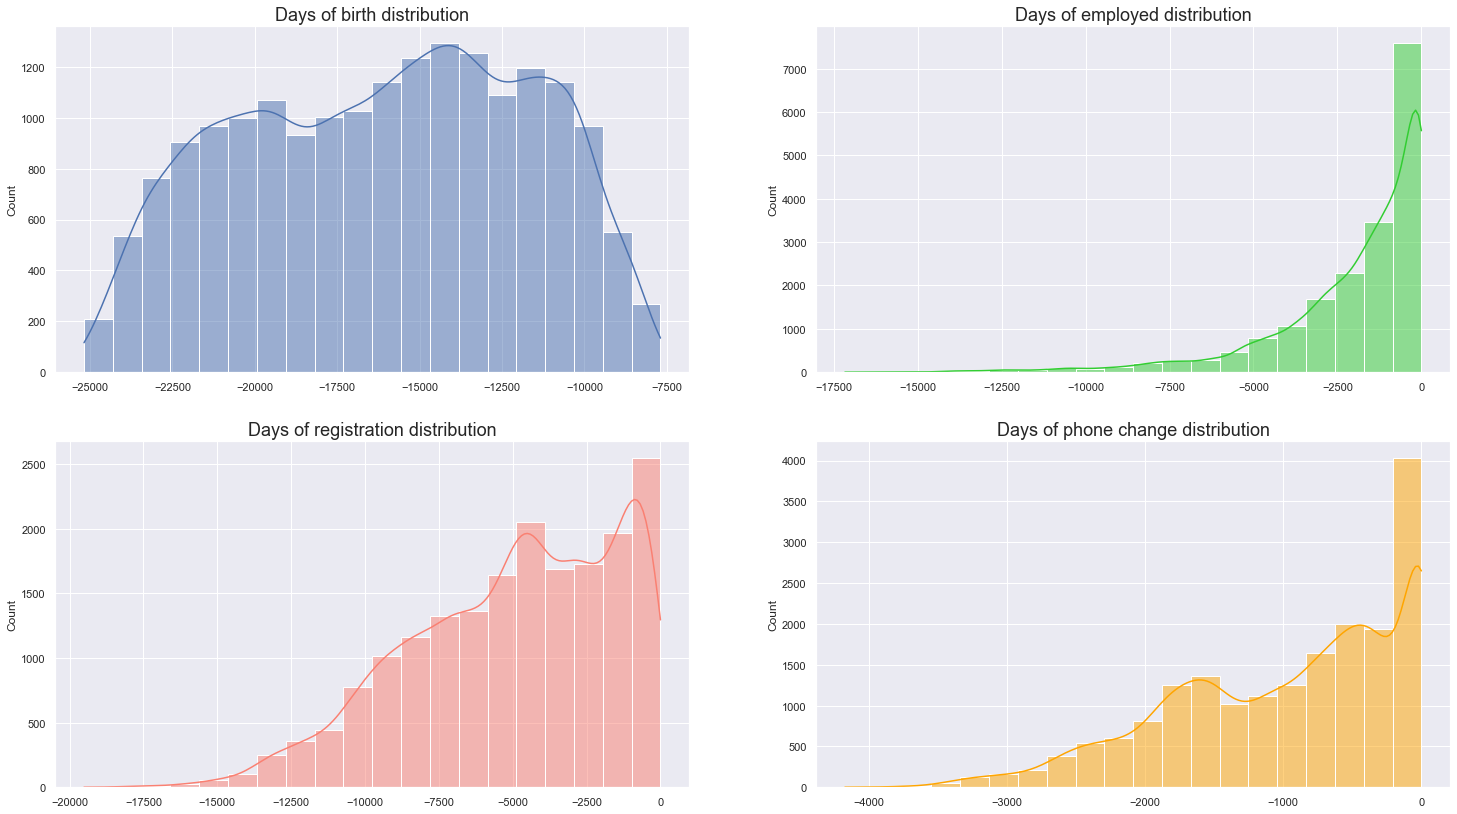

In [14]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(25, 14))
sns.histplot(accepts_eda['days_birth'], ax = ax[0,0], kde = True, bins = 20)
ax[0,0].set_title('Days of birth distribution', fontsize = 18)
ax[0,0].set_xlabel('')

sns.histplot(accepts_eda['days_employed'], color = 'limegreen', ax = ax[0,1], kde = True, bins = 20)
ax[0,1].set_title('Days of employed distribution', fontsize = 18)
ax[0,1].set_xlabel('')

sns.histplot(accepts_eda['days_registration'], color = 'salmon', ax = ax[1,0], kde = True, bins = 20)
ax[1,0].set_title('Days of registration distribution', fontsize = 18)
ax[1,0].set_xlabel('')

sns.histplot(accepts_eda['days_phone_change'], color = 'orange', ax = ax[1,1], kde = True, bins = 20)
ax[1,1].set_title('Days of phone change distribution', fontsize = 18)
ax[1,1].set_xlabel('')

plt.show()

The histogram above visualizes the distribution of diversed calculated days:
- The days of birth has "multimodal" with 3 peaks. The age of the clients ranges between 20 to 70, approximately.
- The distribution of employment days is skew to the left. 18% of customers are pensioners. The working experience varies from 6 months to retirement.
- The days before the application did client change his registration 1 days to more than 18,000 days, equivalents to 1 days to roundly 50 years
- The days before application did client change phone falls between 0 and 4000 days, with most clients changing phone number before 0 to 50 days.

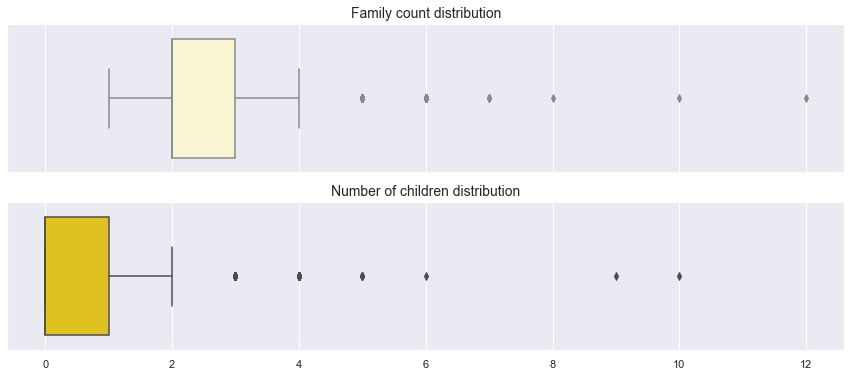

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), sharex=True)
sns.boxplot(data = accepts_eda, x = 'family_count', color = 'lemonchiffon', ax = ax[0])
ax[0].set_title('Family count distribution', fontsize = 14)
ax[0].set_xlabel('')

sns.boxplot(data = accepts_eda, x ='nr_children', color = 'gold', ax = ax[1])
ax[1].set_title('Number of children distribution', fontsize = 14)
ax[1].set_xlabel('')

plt.show()

- The number of family members are between 1 and 12. Most customers have 1 to 4 domestic members.
- The number of children ranges from 0 to 10. Clients tend to have no children or 2 children.

**The plots below with evaluate the relation between numerical variables and target variable**

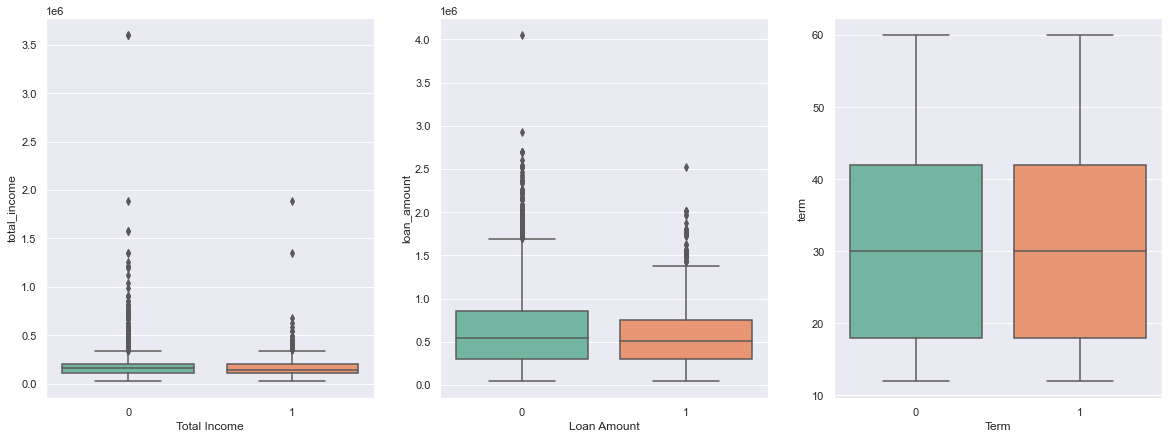

In [16]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,7))
sns.boxplot(ax=ax0, data=accepts_eda, y = 'total_income', x = 'Default', palette = 'Set2')
sns.boxplot(ax=ax1, data=accepts_eda, y ='loan_amount', x = 'Default', palette = 'Set2')
sns.boxplot(ax=ax2, data=accepts_eda, y ='term', x = 'Default', palette = 'Set2')
ax0.set(xlabel = 'Total Income')
ax1.set(xlabel = 'Loan Amount')
ax2.set(xlabel = 'Term')
plt.show()

Regarding the boxplots above, there are several conclusion:

**- Default customers have slightly lower income compared to non-default customers**\
**- The loan amount of default customers is lower than the non-default customers**\
**- There is no difference in terms of duration in loan between non-default and default clients**

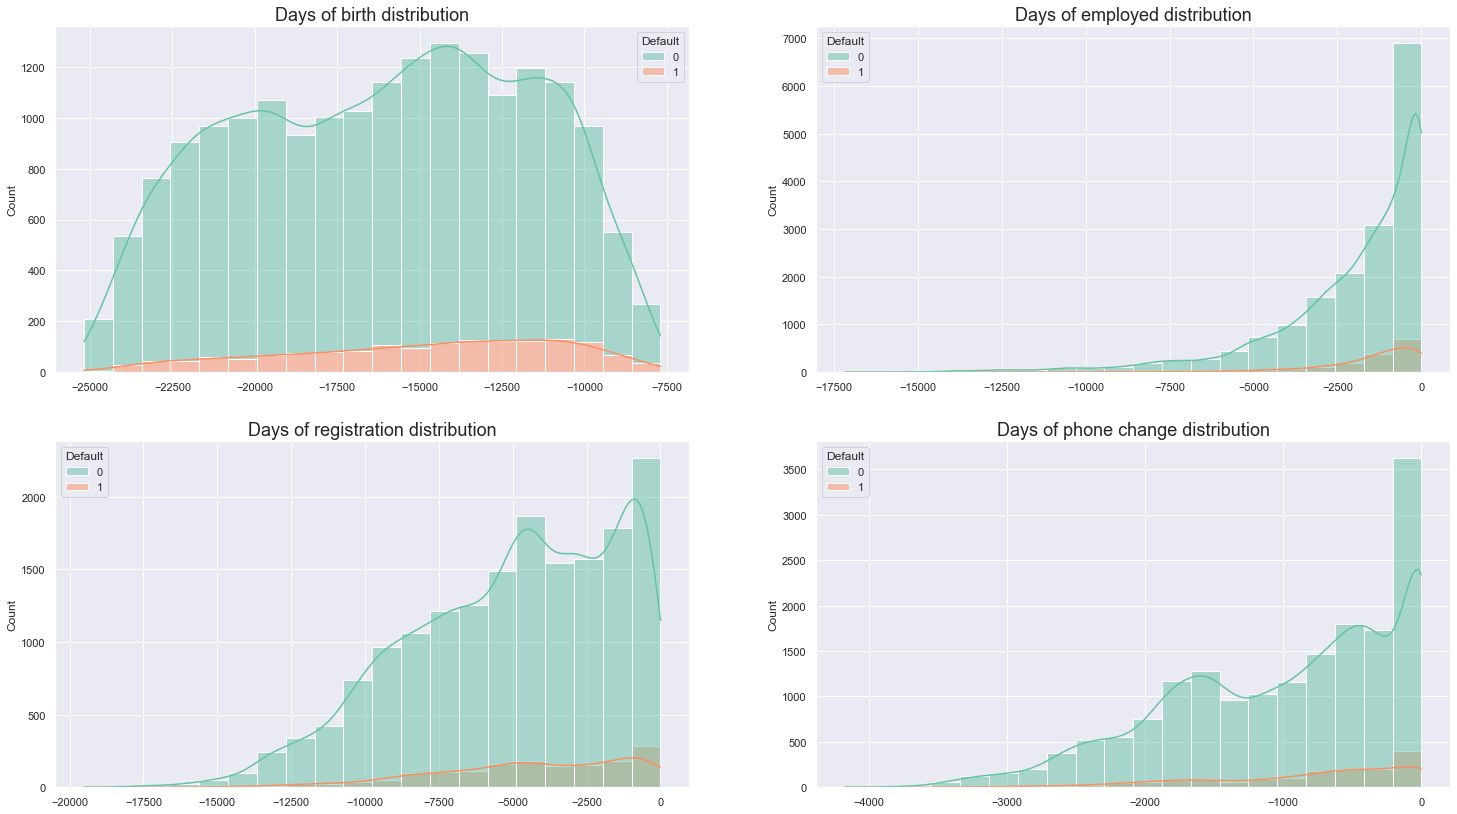

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(25, 14))
sns.histplot(accepts_eda, x = 'days_birth', ax = ax[0,0], hue='Default', multiple = 'stack', palette = 'Set2', kde=True, bins=20)
ax[0,0].set_title('Days of birth distribution', fontsize = 18)
ax[0,0].set_xlabel('')

sns.histplot(accepts_eda, x ='days_employed', ax = ax[0,1], hue='Default', palette = 'Set2', kde=True, bins=20)
ax[0,1].set_title('Days of employed distribution', fontsize = 18)
ax[0,1].set_xlabel('')

sns.histplot(accepts_eda, x ='days_registration', ax = ax[1,0], hue='Default', palette = 'Set2', kde=True, bins=20)
ax[1,0].set_title('Days of registration distribution', fontsize = 18)
ax[1,0].set_xlabel('')

sns.histplot(accepts_eda, x ='days_phone_change', ax = ax[1,1], hue='Default', palette = 'Set2', kde=True, bins=20)
ax[1,1].set_title('Days of phone change distribution', fontsize = 18)
ax[1,1].set_xlabel('')

plt.show()

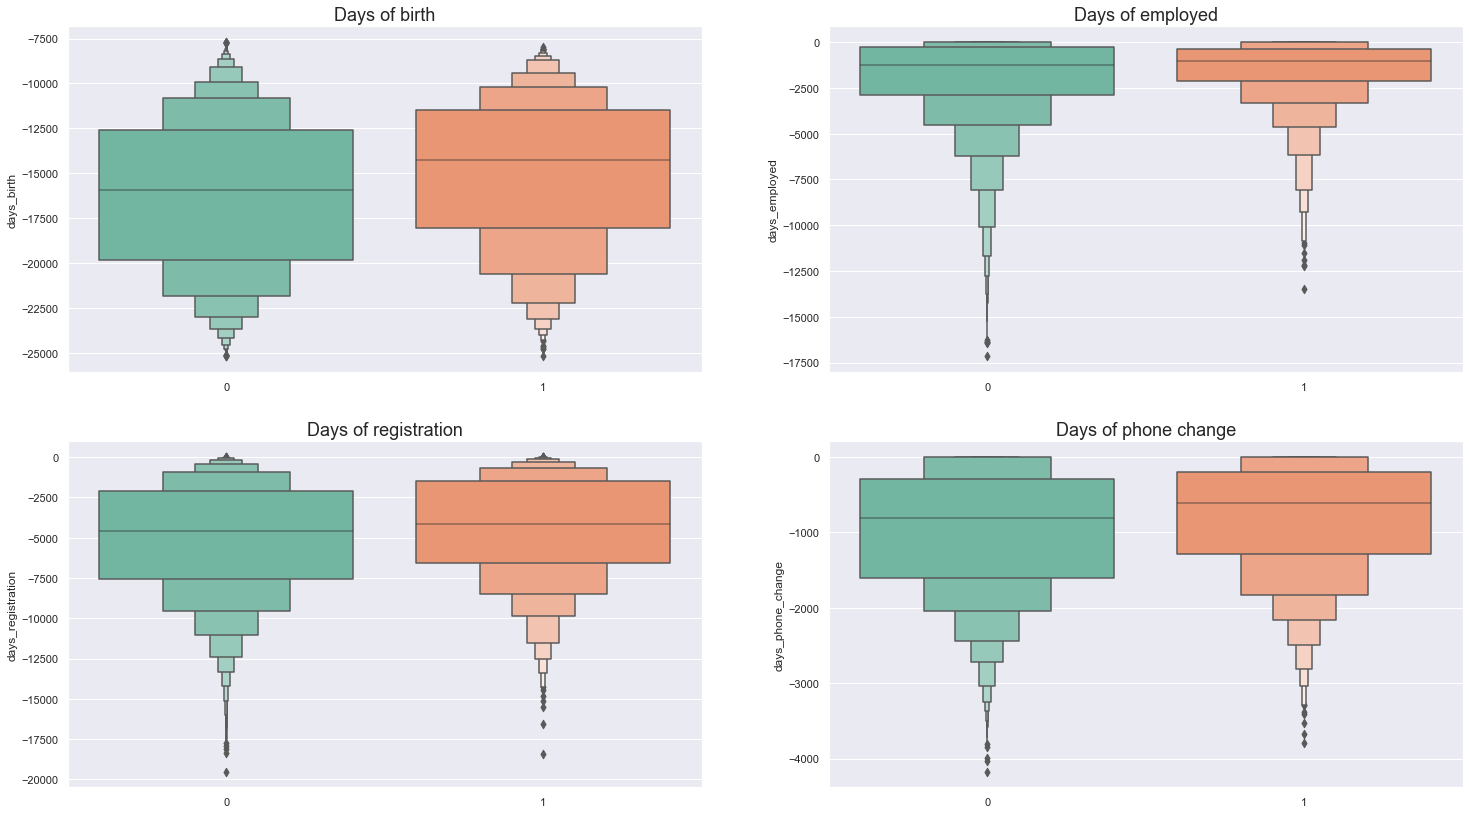

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(25, 14))
sns.boxenplot(data = accepts_eda, x='Default', y = 'days_birth', ax = ax[0,0], palette = 'Set2')
ax[0,0].set_title('Days of birth', fontsize = 18)
ax[0,0].set_xlabel('')

sns.boxenplot(data = accepts_eda, x='Default', y ='days_employed', ax = ax[0,1], palette = 'Set2')
ax[0,1].set_title('Days of employed', fontsize = 18)
ax[0,1].set_xlabel('')

sns.boxenplot(data = accepts_eda, x='Default', y ='days_registration', ax = ax[1,0], palette = 'Set2')
ax[1,0].set_title('Days of registration', fontsize = 18)
ax[1,0].set_xlabel('')

sns.boxenplot(data = accepts_eda, x='Default', y ='days_phone_change', ax = ax[1,1], palette = 'Set2')
ax[1,1].set_title('Days of phone change', fontsize = 18)
ax[1,1].set_xlabel('')

plt.show()

Looking at the the plots above, it's reasonble to point that:

**- Young people tend to present more risk than the older ones**\
In general, older people usually have more financial stability than the younger ones;
From the perspective of a bank or a loan establishment, probably it's safer to offer better credit programs to people who have the condition to pay back.

**- People with shorter employment days has higher tedency to be default**\
The number of working days may have a correlation to the financial situation of a customer. The higher the number of employment days, the more solid the financial stability. As a result, customers with lower job experience may have a higher risk than those with higher employment days 

**- Shorter registration days related to a higher risk**

**- The shorter the number of days to change phones before using the application, the higher the risk**

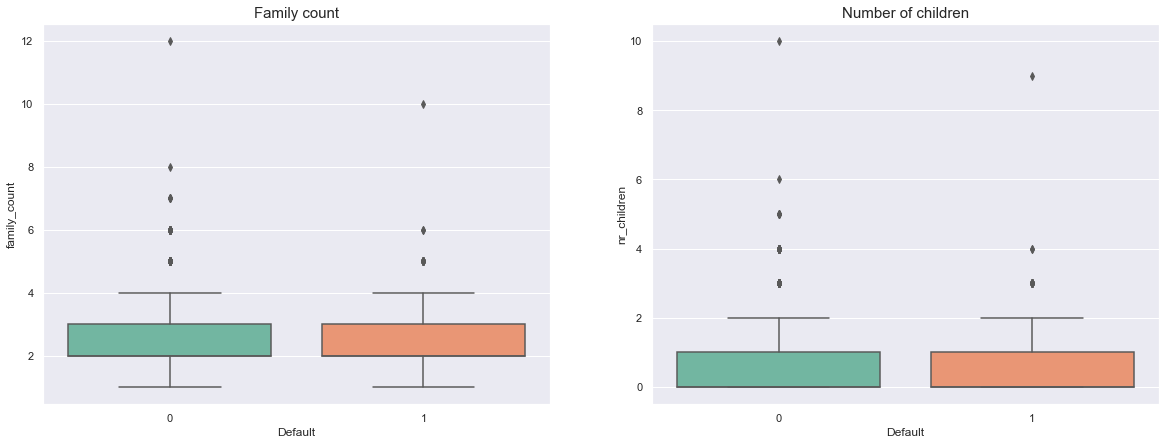

In [19]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(ax=ax0, data=accepts_eda, y = 'family_count', x = 'Default', palette = 'Set2')
sns.boxplot(ax=ax1, data=accepts_eda, y ='nr_children', x = 'Default', palette = 'Set2')
ax0.set_title('Family count', fontsize = 15)
ax1.set_title('Number of children', fontsize = 15)
plt.show()

- There are not much difference between default and non-default clients regarding family count and number of children.
- Both categories has 1 to 4 family members and 0 to 2 children.
- The only distinct characteristic is the outliers of number of members and children.
- Non-default clients has up to 12 member, while default ones has maximum 10 members.
- The maximum number of children for non-default clients is 10, and for default clients is 9.

##### Categorical features

In [20]:
# Specify the category features
cat_features = ['income_type', 'education_type', 'family_status', 'housing_type', 'own_house', 'own_car', 'occupation_type']

In [21]:
order1 = accepts_eda.groupby('income_type')['income_type'].count().sort_values(ascending = False).index
order2 = accepts_eda.groupby('education_type')['education_type'].count().sort_values(ascending = False).index
order3 = accepts_eda.groupby('family_status')['family_status'].count().sort_values(ascending = False).index
order4 = accepts_eda.groupby('housing_type')['housing_type'].count().sort_values(ascending = False).index
order5 = accepts_eda.groupby('occupation_type')['occupation_type'].count().sort_values(ascending = False).index

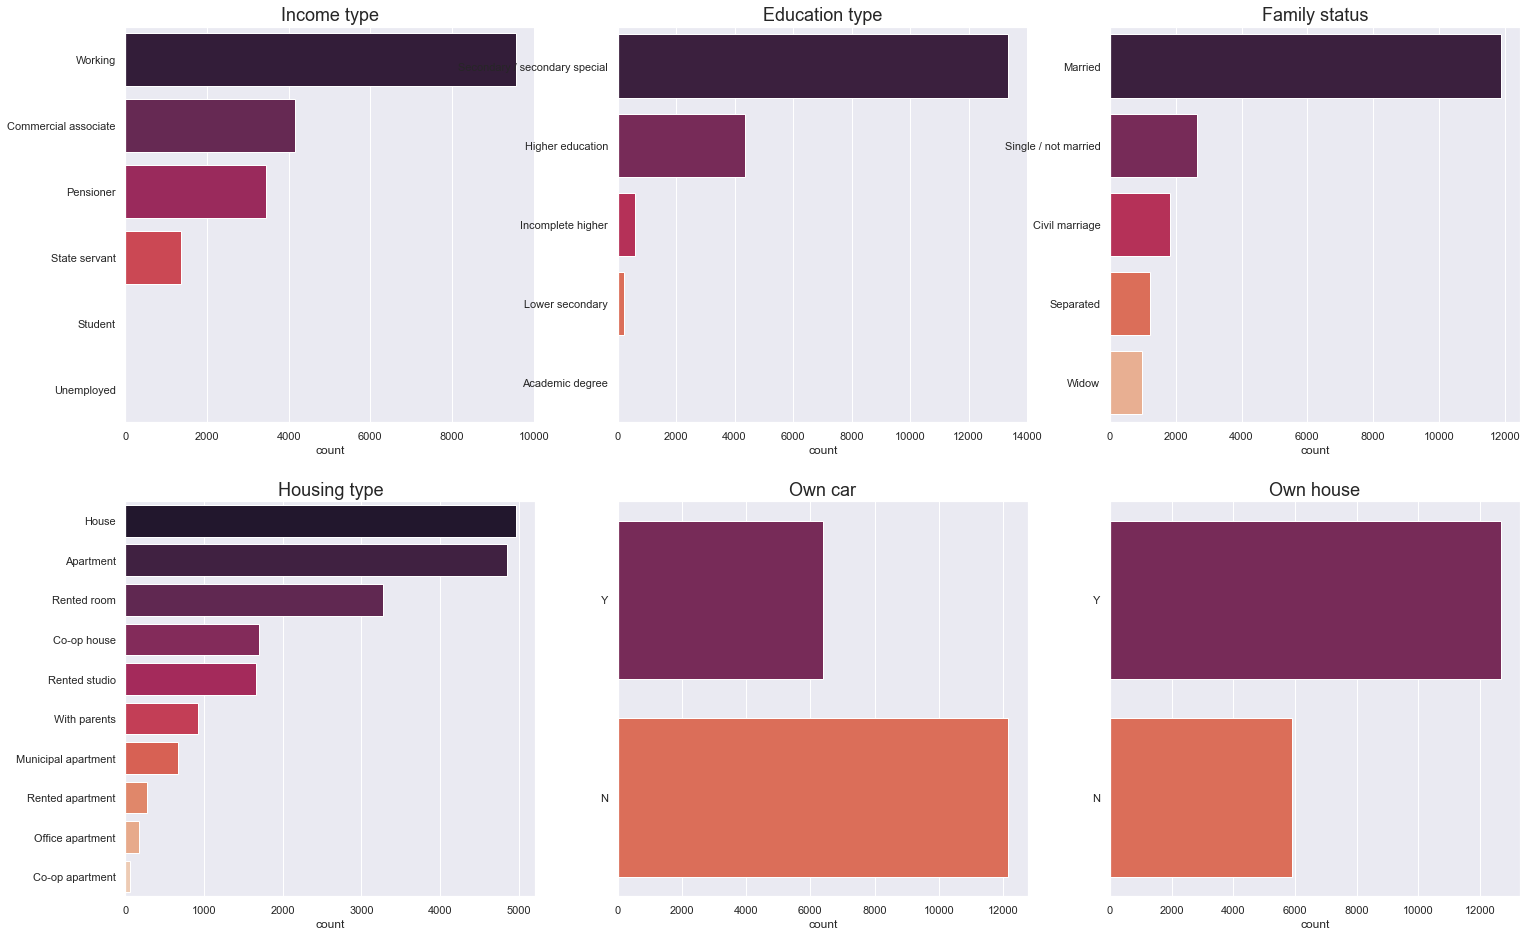

In [22]:
# Visualize
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(25, 16))
sns.countplot(data = accepts_eda, y = 'income_type', ax = ax[0,0], palette = 'rocket', order = order1)
ax[0,0].set_title('Income type', fontsize = 18)
ax[0,0].set_ylabel('')

sns.countplot(data = accepts_eda, y ='education_type', ax = ax[0,1],   palette = 'rocket', order = order2)
ax[0,1].set_title('Education type', fontsize = 18)
ax[0,1].set_ylabel('')

sns.countplot(data = accepts_eda, y ='family_status',  ax = ax[0,2], palette = 'rocket', order = order3)
ax[0,2].set_title('Family status', fontsize = 18)
ax[0,2].set_ylabel('')

sns.countplot(data = accepts_eda, y ='housing_type', ax = ax[1,0], palette = 'rocket', order = order4)
ax[1,0].set_title('Housing type', fontsize = 18)
ax[1,0].set_ylabel('')

sns.countplot(data = accepts_eda, y ='own_car', ax = ax[1,1], palette = 'rocket')
ax[1,1].set_title('Own car', fontsize = 18)
ax[1,1].set_ylabel('')

sns.countplot(data = accepts_eda, y ='own_house', ax = ax[1,2], palette = 'rocket', order=['Y', 'N'])
ax[1,2].set_title('Own house', fontsize = 18)
ax[1,2].set_ylabel('')

plt.show()

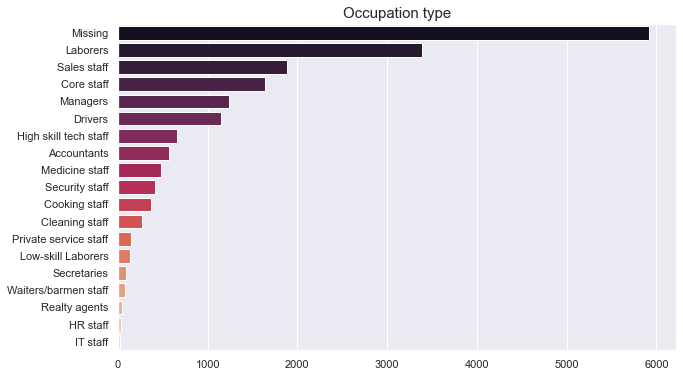

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = accepts_eda, y = 'occupation_type', palette = 'rocket', order = order5)
ax.set_title('Occupation type', fontsize = 15)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

The bar plots above provide an overview of categorical variables:
- Most clients are working employees, married and completed secondary special
- The number of customers owning house larger than those owning car
- Clients tend to not specify their job, with nearly 32% missing occupation type 

**Visualize the categorical features incorporated with target variable**

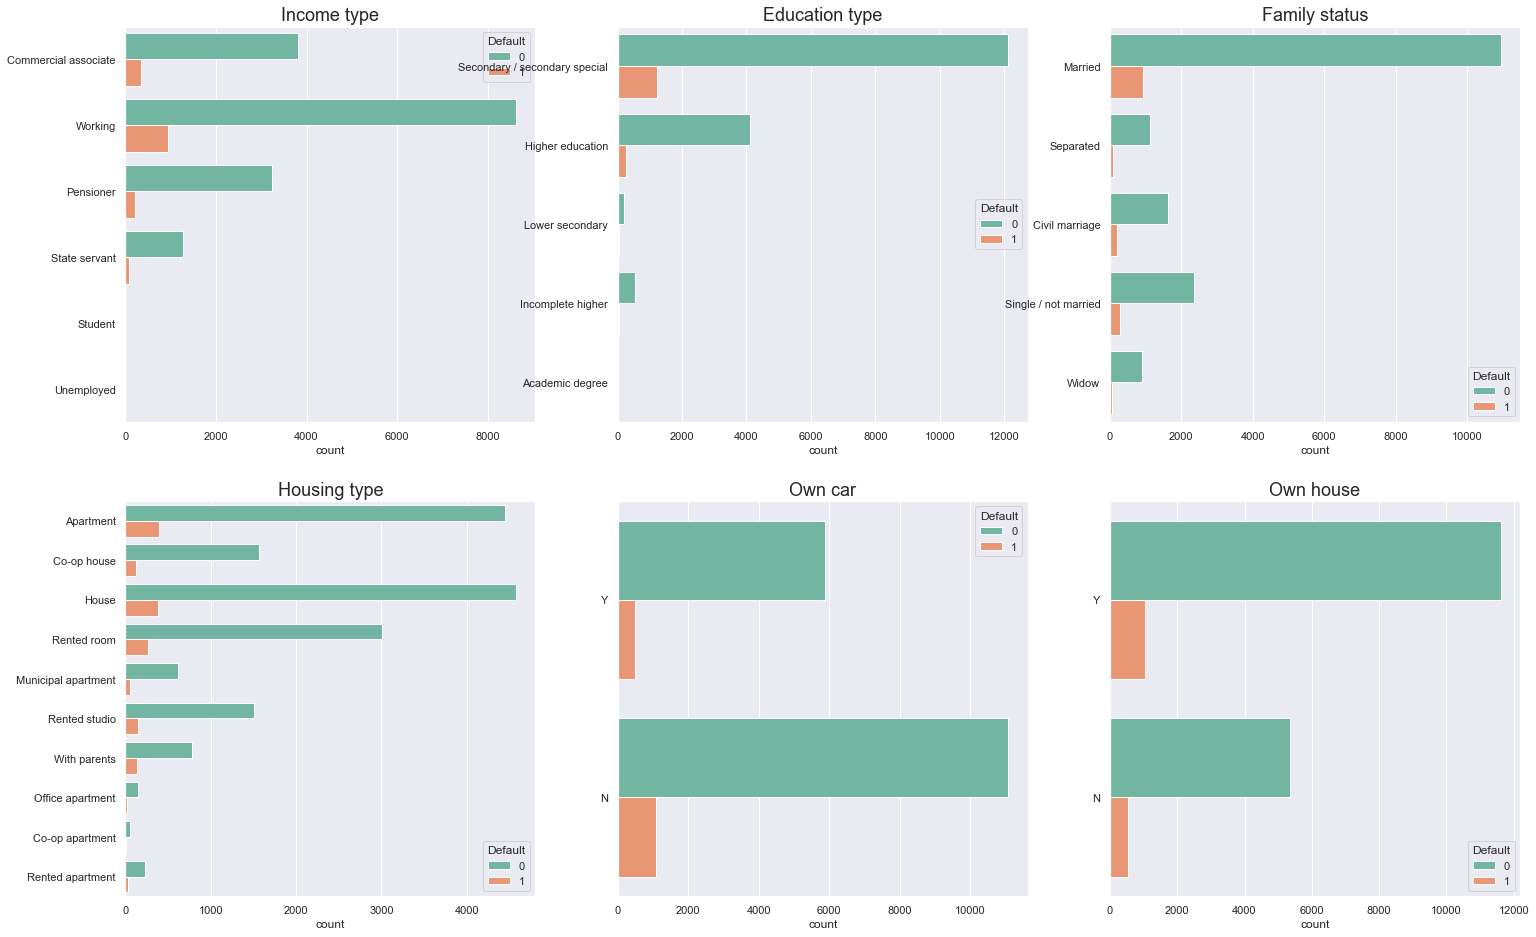

In [24]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(25, 16))
sns.countplot(data = accepts_eda, y = 'income_type', ax = ax[0,0], hue='Default', palette = 'Set2')
ax[0,0].set_title('Income type', fontsize = 18)
ax[0,0].set_ylabel('')

sns.countplot(data = accepts_eda, y ='education_type', ax = ax[0,1], hue='Default', palette = 'Set2')
ax[0,1].set_title('Education type', fontsize = 18)
ax[0,1].set_ylabel('')

sns.countplot(data = accepts_eda, y ='family_status',  ax = ax[0,2], hue='Default', palette = 'Set2')
ax[0,2].set_title('Family status', fontsize = 18)
ax[0,2].set_ylabel('')

sns.countplot(data = accepts_eda, y ='housing_type', ax = ax[1,0], hue='Default', palette = 'Set2')
ax[1,0].set_title('Housing type', fontsize = 18)
ax[1,0].set_ylabel('')

sns.countplot(data = accepts_eda, y ='own_car', ax = ax[1,1], hue='Default', palette = 'Set2')
ax[1,1].set_title('Own car', fontsize = 18)
ax[1,1].set_ylabel('')

sns.countplot(data = accepts_eda, y ='own_house', ax = ax[1,2], hue='Default', palette = 'Set2', order=['Y', 'N'])
ax[1,2].set_title('Own house', fontsize = 18)
ax[1,2].set_ylabel('')

plt.show()

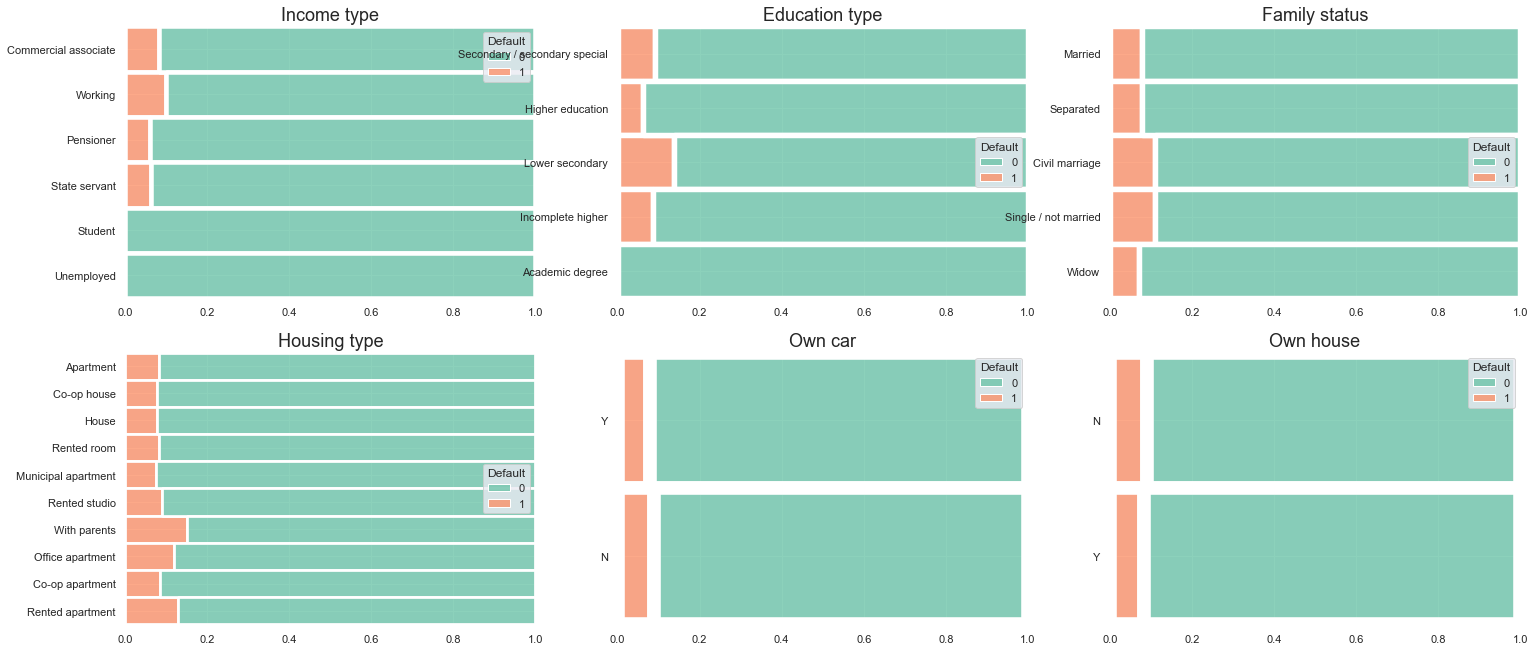

In [25]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(25, 11))
sns.histplot(data = accepts_eda, y = 'income_type', ax = ax[0,0], hue='Default', palette = 'Set2', multiple='fill')
ax[0,0].set_title('Income type', fontsize = 18)
ax[0,0].set_ylabel('')
ax[0,0].set_xlabel('')

sns.histplot(data = accepts_eda, y ='education_type', ax = ax[0,1], hue='Default', palette = 'Set2', multiple='fill')
ax[0,1].set_title('Education type', fontsize = 18)
ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('')

sns.histplot(data = accepts_eda, y ='family_status',  ax = ax[0,2], hue='Default', palette = 'Set2', multiple='fill')
ax[0,2].set_title('Family status', fontsize = 18)
ax[0,2].set_ylabel('')
ax[0,2].set_xlabel('')

sns.histplot(data = accepts_eda, y ='housing_type', ax = ax[1,0], hue='Default', palette = 'Set2', multiple='fill')
ax[1,0].set_title('Housing type', fontsize = 18)
ax[1,0].set_ylabel('')
ax[1,0].set_xlabel('')

sns.histplot(data = accepts_eda, y ='own_car', ax = ax[1,1], hue='Default', palette = 'Set2', multiple='fill')
ax[1,1].set_title('Own car', fontsize = 18)
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')

sns.histplot(data = accepts_eda, y ='own_house', ax = ax[1,2], hue='Default', palette = 'Set2', multiple='fill')
ax[1,2].set_title('Own house', fontsize = 18)
ax[1,2].set_ylabel('')
ax[1,2].set_xlabel('')

plt.show()

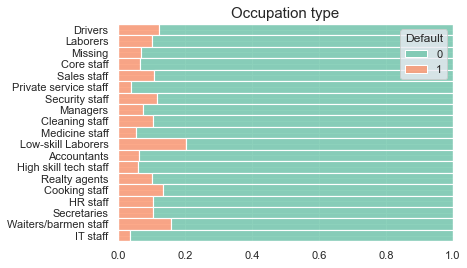

In [26]:
fig, ax = plt.subplots()
sns.histplot(data = accepts_eda, y = 'occupation_type', hue='Default', palette = 'Set2', multiple='fill')
ax.set_title('Occupation type', fontsize = 15)
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

The insights we can take from the plots above are:

**- People who finish lower secondary have higher risk compared to other types of education**\
**- Customers who living with their parents or renting an apartment tend to default**\
**- Low-skilled laborers, cooking staff and waiters tend to have higher risk than other occupation**

#### (c) Create a list of column names to manage variables

In [27]:
# General list of variables
target_var = ['Default']
predictors = [v for v in accepts.columns if v not in target_var]

In [28]:
# Separate category variables and numerical variables
coltype = pd.DataFrame(accepts.dtypes).reset_index()
coltype = coltype.rename({'index':'col', 0:'type'}, axis = 'columns')

cat_vars = list(coltype.col[coltype.type == 'object'])
num_vars = list(coltype.col[(coltype.type != 'object') & (coltype.col != 'Default')])

# Double check the list of variables
assert(len(predictors) == len(num_vars) + len(cat_vars))

## 2. Processing data

In [29]:
#Split data in train (60%), test (40%)
train, test = train_test_split(accepts, test_size=0.4, random_state=42, shuffle=True)

#Reset Index 
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

### 2.1. Error, data correction

#### (a) Check and correct data error - Constant variables

In [30]:
# Count number of unique values of each variable
vars_nunique = accepts[num_vars + cat_vars].apply(pd.Series.nunique, dropna=False, axis=0)
cont_vars = vars_nunique.index[vars_nunique < 2].tolist()
print("Drop constant variable:", cont_vars)

# Correct variable list
num_vars = [v for v in num_vars if v not in cont_vars]
cat_vars = [v for v in cat_vars if v not in cont_vars]

# Update train, test and rejects
train = train[num_vars + cat_vars + target_var]
test = test[num_vars + cat_vars + target_var]
rejects = rejects[num_vars + cat_vars]

Drop constant variable: ['mobile_number']


#### (b) Check and correct data error - Missing values

In [31]:
# Check missing value
print('Train - # NA of num vars:', train[num_vars].isna().sum().sum())
print('Train - # NA of cat vars:', train[cat_vars].isna().sum().sum())
print('Test - # NA of num vars:', test[num_vars].isna().sum().sum())
print('Test - # NA of cat vars:', test[cat_vars].isna().sum().sum())
print('Rejects - # NA of num vars:', rejects[num_vars].isna().sum().sum())
print('Rejects - # NA of cat vars:', rejects[cat_vars].isna().sum().sum())

Train - # NA of num vars: 8401
Train - # NA of cat vars: 3548
Test - # NA of num vars: 5687
Test - # NA of cat vars: 2374
Rejects - # NA of num vars: 7101
Rejects - # NA of cat vars: 2751


In [32]:
# Here, we test the effect of dropping variables with high missing percentage (>60%)
na_threshold = 0.6

# Drop num variables with more than 60% missing values
num_na_pct = train[num_vars].isnull().mean()
num_vars = num_na_pct[num_na_pct <= na_threshold].index.tolist()
print("Drop num variables with high missing pct:", num_na_pct[num_na_pct > na_threshold].tolist())

# Drop cat variables with more than 60% missing values
cat_na_pct = train[cat_vars].isnull().mean()
cat_vars = cat_na_pct[cat_na_pct <= na_threshold].index.tolist()
print("Drop cat variables with high missing pct:", cat_na_pct[cat_na_pct > na_threshold].tolist())

# Update accepts, rejects
train = train[num_vars + cat_vars + target_var]
test = test[num_vars + cat_vars + target_var]
rejects = rejects[num_vars + cat_vars]

Drop num variables with high missing pct: []
Drop cat variables with high missing pct: []


In [33]:
# List dummary variables to track missing values imputation
na_vars = []

In [34]:
# Numerical variables
# Build the missing value imputor using the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imp.fit(train[num_vars])

# Reconstruct the list of vars + indicators
na_vars = na_vars + [num_vars[v] + "_na" for v in imp.indicator_.features_]
impute_vars = num_vars + na_vars

# Apply on train, test, rejects
train[impute_vars] = pd.DataFrame(imp.transform(train[num_vars]), columns=impute_vars)
test[impute_vars] = pd.DataFrame(imp.transform(test[num_vars]), columns=impute_vars)
rejects[impute_vars] = pd.DataFrame(imp.transform(rejects[num_vars]), columns=impute_vars)

In [35]:
# Categorical variables
# We will not impute the missing values since in the following steps, we will use binning to handle the missing values

#### (c) Check and correct data error - Outliers in numerical variables

In [36]:
# Check the outliers on accepts, rejects
for v in num_vars:
    # Calculate the boundaries on accepts [mean-3*sd, mean+3*sd]
    mu = np.mean(train[v])
    sd = np.std(train[v])
    lower = mu - 1.5*sd
    upper = mu + 1.5*sd
    # Check outliers using the boundaries
    train_out = (train[v] < lower) | (train[v] > upper)
    test_out = (test[v] < lower) | (test[v] > upper)
    if np.sum(train_out) + np.sum(test_out) > 0:
        print(v, "has # outliers on train, test :",
              np.sum(train_out), "[", np.round(100*np.mean(train_out), 2), "% ]",
              np.sum(test_out), "[", np.round(100*np.mean(test_out), 2), "% ]")

total_income has # outliers on train, test : 563 [ 5.06 % ] 375 [ 5.05 % ]
loan_amount has # outliers on train, test : 987 [ 8.87 % ] 715 [ 9.64 % ]
term has # outliers on train, test : 1013 [ 9.1 % ] 638 [ 8.6 % ]
interest_rate has # outliers on train, test : 1461 [ 13.13 % ] 982 [ 13.23 % ]
nr_children has # outliers on train, test : 1100 [ 9.88 % ] 712 [ 9.6 % ]
region_population_ratio has # outliers on train, test : 792 [ 7.12 % ] 504 [ 6.79 % ]
days_birth has # outliers on train, test : 1426 [ 12.81 % ] 954 [ 12.86 % ]
days_employed has # outliers on train, test : 2073 [ 18.63 % ] 1382 [ 18.63 % ]
days_registration has # outliers on train, test : 949 [ 8.53 % ] 660 [ 8.89 % ]
phone_number has # outliers on train, test : 3162 [ 28.41 % ] 2103 [ 28.34 % ]
email has # outliers on train, test : 674 [ 6.06 % ] 424 [ 5.71 % ]
days_phone_change has # outliers on train, test : 1007 [ 9.05 % ] 677 [ 9.12 % ]
family_count has # outliers on train, test : 1020 [ 9.17 % ] 667 [ 8.99 % ]
EXT1 h

#### (e) Finalize the processed data

Current lists of variables:
- num_vars : numerical variables
- cat_vars : categorical variables
- na_vars : indicators for tracking missing values, bool [False, True]
- target_var : target variable, Default [0, 1]

In [37]:
# Convert bool variable to int
train[na_vars] = train[na_vars].astype(np.int8)
test[na_vars] = test[na_vars].astype(np.int8)
rejects[na_vars] = rejects[na_vars].astype(np.int8)

In [38]:
# Print out the final variables
print("# num_vars [", len(num_vars), "] :", num_vars[:20], "...")
print("# cat_vars [", len(cat_vars), "] :", cat_vars[:20], "...")
print("# na_vars [", len(na_vars), "] :", na_vars[:20], "...")
print("# target_var [", len(target_var), "] :", target_var)

# num_vars [ 20 ] : ['total_income', 'loan_amount', 'term', 'interest_rate', 'nr_children', 'region_population_ratio', 'days_birth', 'days_employed', 'days_registration', 'phone_number', 'email', 'days_phone_change', 'family_count', 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7'] ...
# cat_vars [ 7 ] : ['own_car', 'own_house', 'income_type', 'education_type', 'family_status', 'housing_type', 'occupation_type'] ...
# na_vars [ 3 ] : ['EXT1_na', 'EXT2_na', 'EXT3_na'] ...
# target_var [ 1 ] : ['Default']


In [39]:
# Sort the data according to the variables list
train = train[num_vars + cat_vars + na_vars + target_var]
test = test[num_vars + cat_vars + na_vars + target_var]
rejects = rejects[num_vars + cat_vars + na_vars]

print(train.shape)
print(test.shape)
print(rejects.shape)

(11129, 31)
(7420, 31)
(9112, 30)


### 2.2. Feature engineering

In other case, we can use the following hints:
- Quickly check the potentially important variables.
- Focus on the most important variables to create new variables.

#### (a) Quickly detect most (potentially) important varriables - Correlation test for numerical variables

In [40]:
# Pearson's correlation for numerical variables
corr = train[num_vars + target_var].corr(method='pearson')
corr = corr[target_var[0]][:-1].dropna().sort_values(ascending=False)
print("Top 5 vars [+] correlated with target_var :"); print(corr[corr > 0][:5])
print("Top 5 vars [-] correlated with target_var :"); print(corr[corr < 0][-5:])

Top 5 vars [+] correlated with target_var :
days_birth           0.076472
days_phone_change    0.066544
days_registration    0.060718
EXT5                 0.047375
email                0.014045
Name: Default, dtype: float64
Top 5 vars [-] correlated with target_var :
loan_amount     -0.038700
days_employed   -0.043885
EXT1            -0.089923
EXT3            -0.155696
EXT2            -0.172823
Name: Default, dtype: float64


#### (b) Create new variables

In [41]:
train['loan_ratio'] = train['loan_amount'] / train['total_income']
test['loan_ratio'] = test['loan_amount'] / test['total_income']
rejects['loan_ratio'] = rejects['loan_amount'] / rejects['total_income']

In [42]:
# Update num_vars
num_vars.append('loan_ratio')

### 2.3. Value transformation (num, cat => cat)

- Categorical variable: remapping
- Continuous variable: discretization

<u>Reference:</u>

- Coussement, K., Lessmann, S., & Verstraeten, G. (2017). A comparative analysis of data preparation algorithms for customer churn prediction: A case study in the telecommunication industry. Decision Support Systems, 95, 27-36.

In [43]:
# List of variables to track the value transformation process
trans_vars = []

#### 2.3.1.  Weight-of-Evidence (WoE) binning

In [44]:
# import module
from Binning import WOE

In [45]:
num = ['total_income', 'loan_amount', 'days_birth', 'days_employed', 'EXT1', 'EXT2', 'EXT3']

In [46]:
# Test multiple stop limits
for v in num:
    woe_var = v + "_woe"
    woe_var = WOE.WOEEncoder(pred_var = v, target_var = 'Default')
    woe_var.fit_transform(train, stop_limit=0.05, q=20)
    print(woe_var.test_limit(train, q=20))

Detected 'float64' variable, automatically transformed using q=20 quantiles ... 
Fitted 3 bins for 'total_income' (levels=17)...
Detected 'float64' variable, automatically transformed using q=20 quantiles ... 
   stop_limit  iv_total  n_bins
0       0.010  0.027771       5
1       0.025  0.023097       3
2       0.050  0.023097       3
3       0.100  0.023097       3
Detected 'float64' variable, automatically transformed using q=20 quantiles ... 
Fitted 3 bins for 'loan_amount' (levels=20)...
Detected 'float64' variable, automatically transformed using q=20 quantiles ... 
   stop_limit  iv_total  n_bins
0       0.010  0.045904       3
1       0.025  0.045904       3
2       0.050  0.045904       3
3       0.100  0.045904       3
Detected 'float64' variable, automatically transformed using q=20 quantiles ... 
Fitted 2 bins for 'days_birth' (levels=20)...
Detected 'float64' variable, automatically transformed using q=20 quantiles ... 
   stop_limit  iv_total  n_bins
0       0.010  0.0695

The information value for EXT2 and EXT3 variables are high. However, for interpretation purpose, we will not iuse binning for EXT2 and EXT3.

#### 2.3.3. Finalize value transformation

- Finalize the variables list
- Arrange the data columns

<u>Note:</u> After the end of the value transformation step, we have these final lists of variables to manage:
- num_vars
- na_vars
- cat_vars = cat_vars + trans_vars

In [49]:
# Finalize the variable list
cat_vars = cat_vars + trans_vars
print("Transformed num, cat variables into # new categorical variables :", len(trans_vars))

Transformed num, cat variables into # new categorical variables : 0


In [50]:
# Arrange the data columns
train = train[num_vars + cat_vars + na_vars + target_var]
test = test[num_vars + cat_vars + na_vars + target_var]
rejects = rejects[num_vars + cat_vars + na_vars]
print(train.shape)
print(test.shape)
print(rejects.shape)

(11129, 32)
(7420, 32)
(9112, 31)


### 2.4. Value representation (cat => num)

- Categorical variable: Dummy coding
- Categorical variable: Incidence replacement
- Categorical variable: Weight of Evidence (WoE) conversion

<u>Reference:</u>  

- Coussement, K., Lessmann, S., & Verstraeten, G. (2017). A comparative analysis of data preparation algorithms for customer churn prediction: A case study in the telecommunication industry. Decision Support Systems, 95, 27-36.

In [51]:
# List of variables to track the value representation process
dummy_vars = []
repr_vars = []

#### 2.4.1. Weight-of-Evidence (WoE) binning

In [52]:
# import module
from Binning import WOE

In [53]:
# Test multiple stop limits
for v in cat_vars:
    woe_var = v + "_woe"
    woe_var = WOE.WOEEncoder(pred_var = v, target_var = 'Default')
    woe_var.fit_transform(train, stop_limit=0.05)
    print(woe_var.test_limit(train, q=10))

Fitted 4 bins for 'own_car' (levels=2)...
   stop_limit  iv_total  n_bins
0       0.010  0.005655       2
1       0.025  0.005655       2
2       0.050  0.005655       2
3       0.100  0.005655       2
Fitted 4 bins for 'own_house' (levels=2)...
   stop_limit  iv_total  n_bins
0       0.010  0.002436       2
1       0.025  0.002436       2
2       0.050  0.002436       2
3       0.100  0.002436       2
Fitted 4 bins for 'income_type' (levels=6)...
   stop_limit  iv_total  n_bins
0       0.010  0.042523       3
1       0.025  0.042523       3
2       0.050  0.042523       3
3       0.100  0.042523       3
Fitted 3 bins for 'education_type' (levels=5)...
   stop_limit  iv_total  n_bins
0       0.010   0.02397       3
1       0.025   0.02397       3
2       0.050   0.02397       3
3       0.100   0.02397       3
Fitted 4 bins for 'family_status' (levels=5)...
   stop_limit  iv_total  n_bins
0       0.010  0.027922       3
1       0.025  0.027922       3
2       0.050  0.027922       3
3  

Regarding the information values, occupation_type, income_type and housing_type have the highest information value total. As a result, WOE encoded is applied to occupation_type, income_type and housing_type to reduce the number of variables.

In [54]:
# Apply WOE binning to the "occupation_type" variable
occup_woe = WOE.WOEEncoder(pred_var='occupation_type', target_var='Default')
occup_woe.fit_transform(train, stop_limit=0.05)
df_occup = pd.DataFrame(list(occup_woe.fit_dict.items()))
df_occup = df_occup.rename({0:'occupation_type', 1 : 'occup_woe'}, axis = 1)

Fitted 3 bins for 'occupation_type' (levels=20)...


In [55]:
# Merge df_occup with accepts and rejects
train['occupation_type'] = train['occupation_type'].fillna('Missing')
test['occupation_type'] = test['occupation_type'].fillna('Missing')
rejects['occupation_type'] = rejects['occupation_type'].fillna('Missing')

train = pd.merge(train, df_occup, on = 'occupation_type', how = 'left')
test = pd.merge(test, df_occup, on = 'occupation_type', how = 'left')
rejects = pd.merge(rejects, df_occup, on = 'occupation_type', how = 'left')

In [56]:
# Apply WOE binning to the "income_type" variable
income_woe = WOE.WOEEncoder(pred_var='income_type', target_var='Default')
income_woe.fit_transform(train, stop_limit=0.05)
df_income = pd.DataFrame(list(income_woe.fit_dict.items()))
df_income = df_income.rename({0:'income_type', 1 : 'income_woe'}, axis = 1)
df_income

Fitted 4 bins for 'income_type' (levels=6)...


income_type     income_woe
0               Student  income_type_1
1            Unemployed  income_type_1
2         State servant  income_type_3
3             Pensioner  income_type_3
4               Working  income_type_4
5  Commercial associate  income_type_4

In [57]:
# Merge df_occup with accepts and rejects
train = pd.merge(train, df_income, on = 'income_type', how = 'left')
test = pd.merge(test, df_income, on = 'income_type', how = 'left')
rejects = pd.merge(rejects, df_income, on = 'income_type', how = 'left')

In [58]:
# Apply WOE binning to the "housing_type" variable
housing_woe = WOE.WOEEncoder(pred_var='housing_type', target_var='Default')
housing_woe.fit_transform(train, stop_limit=0.05)
df_housing = pd.DataFrame(list(housing_woe.fit_dict.items()))
df_housing = df_housing.rename({0:'housing_type', 1 : 'housing_woe'}, axis = 1)
df_housing

Fitted 3 bins for 'housing_type' (levels=10)...


housing_type     housing_woe
0     Rented apartment  housing_type_1
1     Office apartment  housing_type_1
2         With parents  housing_type_1
3            Apartment  housing_type_2
4        Rented studio  housing_type_2
5          Rented room  housing_type_3
6          Co-op house  housing_type_3
7      Co-op apartment  housing_type_3
8  Municipal apartment  housing_type_3
9                House  housing_type_3

In [59]:
# Merge df_occup with accepts and rejects
train = pd.merge(train, df_housing, on = 'housing_type', how = 'left')
test = pd.merge(test, df_housing, on = 'housing_type', how = 'left')
rejects = pd.merge(rejects, df_housing, on = 'housing_type', how = 'left')

In [60]:
# Drop variables
train.drop(['occupation_type', 'income_type', 'housing_type'], inplace=True, axis = 1)
test.drop(['occupation_type', 'income_type', 'housing_type'], inplace=True, axis = 1)
rejects.drop(['occupation_type', 'income_type', 'housing_type'], inplace=True, axis = 1)

In [61]:
# Update cat_vars

cat_vars.remove('occupation_type')
cat_vars.remove('income_type')
cat_vars.remove('housing_type')
cat_vars.append('occup_woe')
cat_vars.append('income_woe')
cat_vars.append('housing_woe')

In [62]:
cat_vars

['own_car',
 'own_house',
 'education_type',
 'family_status',
 'occup_woe',
 'income_woe',
 'housing_woe']

In [63]:
print(train.shape)
print(test.shape)
print(rejects.shape)

(11129, 32)
(7420, 32)
(9112, 31)


The binning method takes care of the na values, therefore we wont impute missing values for categorical.

#### 2.4.2. Dummy coding

<u>Note:</u> Here, we can fit the encoder on both train and test to make sure it captures all unique categories.

#### (a) Test the value representation on a categorical variable

In [64]:
# Select a cat variable
v = "family_status"

# Build the dummy encoding on [Var194]
enc = OneHotEncoder(drop="first", handle_unknown="error")
enc.fit(pd.concat([accepts[[v]], rejects[[v]]], axis=0))
enc.categories_

[array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
        'Widow'], dtype=object)]

In [65]:
# Transform a categorical variable
dummy_v = enc.transform(accepts[[v]])
dummy_v.toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

#### (b) Apply the value representation for all categorical variables

In [66]:
# TODO: More efficient implementation
if enable_repr_dummy:
    # Create dummy variables, drop the first dummy column
    enc = OneHotEncoder(drop="first", handle_unknown="error")
    enc.fit(pd.concat([train[cat_vars], test[cat_vars], rejects[cat_vars]], axis=0))
    dummy_vars = enc.get_feature_names_out().tolist()
    repr_vars = repr_vars + dummy_vars
    # Transform train, rejects
    train_dummy = enc.transform(train[cat_vars])
    test_dummy = enc.transform(test[cat_vars])
    rejects_dummy = enc.transform(rejects[cat_vars])

#### 2.4.3. Finalize value representation 

#### (a) Drop categorical variables, add dummy variables

At the end of this step, all categorical variables were represented by dummy variables or numerical variables. Therefore, it is no need to keep categorical variables.

In [67]:
# Drop cat vars
if drop_cat_vars:
    train = train.drop(cat_vars, axis=1)
    test = test.drop(cat_vars, axis=1)
    rejects = rejects.drop(cat_vars, axis=1)
    cat_vars = []

In [68]:
# Add dummy variables
if enable_repr_dummy:
    train = pd.concat([train, pd.DataFrame(train_dummy.toarray(), columns=dummy_vars)], axis=1)
    test = pd.concat([test, pd.DataFrame(test_dummy.toarray(), columns=dummy_vars)], axis=1)
    rejects = pd.concat([rejects, pd.DataFrame(rejects_dummy.toarray(), columns=dummy_vars)], axis=1)
    del train_dummy, test_dummy, rejects_dummy

#### (b) Impute missing values created by value representation

In [69]:
if len(repr_vars) > 0:
    imp = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
    imp.fit(train[repr_vars])
    test[repr_vars] = pd.DataFrame(imp.transform(test[repr_vars]), columns=repr_vars)
    rejects[repr_vars] = pd.DataFrame(imp.transform(rejects[repr_vars]), columns=repr_vars)

#### (c) Finalize the variables list

<u>Note:</u> At the end of the value representation step, we have these final lists of variables to manage:
- num_vars = num_vars + repr_vars
- na_vars

In [70]:
# Combine the variable list
num_vars = num_vars + repr_vars
print("Represented cat variables with # new num variables :", len(repr_vars))

Represented cat variables with # new num variables : 16


In [71]:
# Arrange the data columns
train = train[num_vars + cat_vars + na_vars + target_var]
test = test[num_vars + cat_vars + na_vars + target_var]
rejects = rejects[num_vars + cat_vars + na_vars]
print(train.shape)
print(test.shape)
print(rejects.shape)

(11129, 41)
(7420, 41)
(9112, 40)


In [72]:
train.head()

total_income  loan_amount  term  interest_rate  nr_children  \
0      180000.0     203760.0  36.0       3.297811          1.0   
1      121500.0     135000.0  12.0       3.217821          1.0   
2      135000.0     225000.0  36.0       3.250128          1.0   
3      112500.0     241618.5  36.0       3.585873          0.0   
4       81000.0     180000.0  12.0       3.701079          0.0   

   region_population_ratio  days_birth  days_employed  days_registration  \
0                 0.014464    -17385.0        -7192.0            -7121.0   
1                 0.008474    -18048.0        -4608.0            -6810.0   
2                 0.009657    -11777.0        -1712.0            -5909.0   
3                 0.018029    -13849.0        -1881.0            -6092.0   
4                 0.030755     -8578.0         -535.0            -1081.0   

   phone_number  email  days_phone_change  family_count      EXT1      EXT2  \
0           0.0    0.0            -1732.0           2.0  0.501121  0.565720   
1           0.0    0.0             -354.0           2.0  0.501121  0.489436   
2           0.0    0.0            -1742.0           3.0  0.601240  0.477554   
3           0.0    0.0            -1051.0           2.0  0.303447  0.372274   
4           0.0    0.0             -709.0           1.0  0.319622  0.208310   

       EXT3  EXT4  EXT5  EXT6  EXT7  loan_ratio  own_car_Y  own_house_Y  \
0  0.614414   0.0   1.0   0.0   0.0    1.132000        0.0          1.0   
1  0.529890   0.0   1.0   0.0   0.0    1.111111        0.0          1.0   
2  0.706205   0.0   0.0   0.0   0.0    1.666667        1.0          0.0   
3  0.722393   0.0   1.0   0.0   0.0    2.147720        0.0          1.0   
4  0.454321   0.0   1.0   0.0   0.0    2.222222        0.0          0.0   

   education_type_Higher education  education_type_Incomplete higher  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              1.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   education_type_Lower secondary  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   education_type_Secondary / secondary special  family_status_Married  \
0                                           1.0                    0.0   
1                                           1.0                    0.0   
2                                           0.0                    1.0   
3                                           1.0                    1.0   
4                                           1.0                    0.0   

   family_status_Separated  family_status_Single / not married  \
0                      0.0                                 0.0   
1                      1.0                                 0.0   
2                      0.0                                 0.0   
3                      0.0                                 0.0   
4                      1.0                                 0.0   

   family_status_Widow  occup_woe_occupation_type_2  \
0                  1.0                          0.0   
1                  0.0                          0.0   
2                  0.0                          0.0   
3                  0.0                          0.0   
4                  0.0                          0.0   

   occup_woe_occupation_type_3  income_woe_income_type_3  \
0                          0.0                       1.0   
1                          1.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       1.0   

   income_woe_income_type_4  hous

### 2.5. Other data processing

In [73]:
# Copy train, test befor normalizing
train_not_normalized = train.copy()
test_not_normalized = test.copy()

#### (a) Data normalization - Numerical variables

In [74]:
if enable_normalize:
    for v in num_vars:
        # Build the normalizer on accepts
        scaler = MinMaxScaler().fit(train[[v]])
        # Apply on accepts, rejects
        train[v] = scaler.transform(train[[v]])
        test[v] = scaler.transform(test[[v]])
        rejects[v] = scaler.transform(rejects[[v]])

####  (b) Filter out low variance variables (or constant)

During the data processing, we may accidentally create some new constant variables. Therefore, it is necessary to filter again.

In [75]:
# List of all predictors
predictors = num_vars + cat_vars + na_vars

In [76]:
# Detect constant vars
sel = VarianceThreshold(0)  # Var = 0 by default
sel.fit(train[predictors])
const_vars = [predictors[i] for i in np.where(sel.variances_ == 0)[0]]
predictors = [v for v in predictors if v not in const_vars]

# Drop from accepts, rejects
print('Drop # constant vars :', len(const_vars))
train = train.drop(const_vars, axis=1)
test = test.drop(const_vars, axis=1)
rejects = rejects.drop(const_vars, axis=1)

Drop # constant vars : 1


In [77]:
const_vars

['EXT6']

#### (c) Drop duplicated variables

Sometime, the data processing process can create a lot of duplicated variables. In this case, it is necessary to identify and drop them.

In [78]:
# Count the duplicated vars
dup_vars = train[predictors].T.duplicated()
print('# duplicated vars :', dup_vars.sum())

# duplicated vars : 0


In [79]:
# Drop the duplicated vars from accepts, rejects
predictors = [predictors[i] for i in range(0, len(predictors)) if not dup_vars[i]]
train = train[predictors + target_var]
test = test[predictors + target_var]
rejects = rejects[predictors]

In [80]:
# Print out the data to check
print(train.shape)
print(test.shape)
print(rejects.shape)

(11129, 40)
(7420, 40)
(9112, 39)


### 2.6. Variable selection

<u>Reference:</u>  

- Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights into churn prediction in the telecommunication sector: A profit driven data mining approach. European Journal of Operational Research, 218(1), 211-229.

In [81]:
# Create several lists to handle variables
target_var = ['Default']
predictors = [v for v in train.columns if v not in target_var]

####  (a) Variable selection: Fisher Score

In [82]:
def FisherScore(bt, target_var, predictors):
    """
    This function calculate the Fisher score of a variable.

    Ref:
    ---
    Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights
    into churn prediction in the telecommunication sector: A profit driven data mining
    approach. European Journal of Operational Research, 218(1), 211-229.
    """
    
    # Get the unique values of dependent variable
    target_var_val = bt[target_var].unique()
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[bt[target_var]==target_var_val[0], v]) - np.mean(bt.loc[bt[target_var]==target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[bt[target_var]==target_var_val[0], v]) + np.var(bt.loc[bt[target_var]==target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [83]:
# Calculate Fisher Score for all variable
fs = FisherScore(train, target_var[0], predictors)
fs_df = pd.DataFrame({"predictor":predictors, "fisherscore":fs})
fs_df = fs_df.sort_values('fisherscore', ascending=False)
fs_df.head(10)

predictor  fisherscore
14                         EXT2     0.417077
15                         EXT3     0.392086
13                         EXT1     0.229242
31  occup_woe_occupation_type_3     0.197544
6                    days_birth     0.195595
11            days_phone_change     0.175309
8             days_registration     0.158055
30  occup_woe_occupation_type_2     0.146410
33     income_woe_income_type_4     0.145790
32     income_woe_income_type_3     0.145473

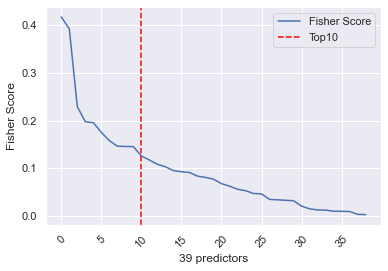

In [84]:
# Visualize the Fisher Score
plt.plot(fs_df['fisherscore'].values.squeeze())
plt.axvline(x=10, linestyle='dashed', color='red')
plt.xticks(rotation=45)
plt.xlabel(str(fs_df.shape[0]) + ' predictors')
plt.ylabel('Fisher Score')
plt.legend(['Fisher Score', 'Top10'])
plt.show()

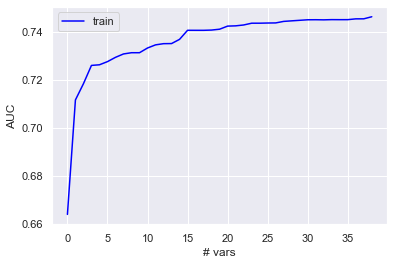

In [85]:
# Check how AUC change when add more variables: Top n vars
fs_scores = []
top_n_vars = 39
for i in range(1, top_n_vars+1):
    if i % 100 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = LogisticRegression()
    fs_scores.append(cross_validate(clf, train[top_n_predictors], train[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0, n_jobs=-1, return_train_score=True))

# How the AUC curve looks like when adding top vars
plt.plot([s['train_score'].mean() for s in fs_scores], color='blue')
plt.xlabel('# vars')
plt.ylabel('AUC')
plt.legend(['train'])
plt.show()

Regarding the plot, we will choose 30 variables to get the best result at AUC.

In [87]:
# Select the top variables based on Fisher Score
n_top_fs_vars = 30  # Top FS vars
top_fs_vars = fs_df['predictor'].values[:n_top_fs_vars]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 30


array(['EXT2', 'EXT3', 'EXT1', 'occup_woe_occupation_type_3',
       'days_birth', 'days_phone_change', 'days_registration',
       'occup_woe_occupation_type_2', 'income_woe_income_type_4',
       'income_woe_income_type_3', 'EXT5', 'days_employed',
       'education_type_Higher education', 'loan_amount',
       'family_status_Married', 'EXT1_na',
       'family_status_Single / not married', 'region_population_ratio',
       'education_type_Secondary / secondary special', 'phone_number',
       'EXT3_na', 'housing_woe_housing_type_3',
       'education_type_Lower secondary', 'own_car_Y', 'loan_ratio',
       'total_income', 'own_house_Y', 'email', 'nr_children',
       'interest_rate'], dtype=object)

## 3. Modeling

In [88]:
#Split test in test (20%), validation (20%)
valid, test = train_test_split(test, test_size=0.5, random_state=42)

#Reset Index 
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

In [89]:
# Choose predictors based on Fisher score
cols = top_fs_vars

In [90]:
# Define X, y, and rejects
X_train, X_valid, X_test = train[cols], valid[cols], test[cols]
y_train, y_valid, y_test = train['Default'], valid['Default'], test['Default']
reject = rejects[cols]

In [91]:
# evaluation metrics
def eval_metrics(proba, true):
    proba   = np.asarray(proba)
    true  = np.asarray(true, dtype=int)
    pred    = np.round(proba) # convert proba to binary labels

    auc         = roc_auc_score(true, proba)
    f1          = f1_score(true, pred)

    return {
        'AUC': auc,
        'F1': f1,
    }

In [92]:
def run_GridSearch(name, data, model, param_grid, **kwargs):
    # save results
    metrics = kwargs.get("metrics", defaultdict(dict))

    #grid search parameters in grid_values
    #scoring is based on roc_auc -> outcome of gs is best model from grid search
    gs = GridSearchCV(model, param_grid = param_grid, scoring = kwargs.get("scoring", 'roc_auc'), cv=kwargs.get("cv", 3), refit=kwargs.get("refit", True))
    gs.fit(data["X_train"], data["y_train"])
    
    # predict
    proba_train   = gs.predict_proba(data["X_train"])[:,1]
    proba_valid   = gs.predict_proba(data["X_valid"])[:,1]

    # evaluate
    metrics[name]["train"] = eval_metrics(proba_train,data["y_train"])
    metrics[name]["valid"] = eval_metrics(proba_valid,data["y_valid"])

    # prints
    if kwargs.get("print", True):
        print(f"{name}: {gs.best_params_}")
        for key, val in metrics[name].items():
            print(f"{key}: ", "\t".join([f"{k}: {v:.4f}" for k,v in val.items()]))

        cmtx = pd.DataFrame(
        confusion_matrix(data["y_valid"], np.round(proba_valid)), 
        index=['true:no', 'true:yes'], 
        columns=['pred:no', 'pred:yes'])

        print(cmtx)
    
    return gs, metrics

### 3.1 Algorithms

In [93]:
# original data
data_temp = {
    "X_train":X_train,
    "y_train":y_train,
    "X_valid":X_valid,
    "y_valid":y_valid,
}

#### (a) Random Forest

In [94]:
#Setup Grid search for random forest model
rf = RandomForestClassifier(random_state=42)

models = {"rf":rf}

# grid search values 
grid_values = { "rf":{
    'n_estimators':[200, 300],
    'criterion' : ["gini"],
    'max_features':["log2"]
                }
            }

In [95]:
model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

rf: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 300}
train:  AUC: 1.0000	F1: 1.0000
valid:  AUC: 0.7468	F1: 0.0000
          pred:no  pred:yes
true:no      3407         0
true:yes      303         0


#### (b) XGBoost

In [96]:
#Setup Grid search for xgboost model
xgb = XGBClassifier(n_jobs = -1,random_state=42, use_label_encoder=False)

models = {"xgb":xgb}

# grid search values 
grid_values = { "xgb":{
    'max_depth': [2, 6],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'eval_metric' : ["error"]
                }
            }

In [97]:
model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

xgb: {'eval_metric': 'error', 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300}
train:  AUC: 0.7967	F1: 0.0103
valid:  AUC: 0.7643	F1: 0.0000
          pred:no  pred:yes
true:no      3407         0
true:yes      303         0


#### (c) LGBM

In [98]:
#Setup Grid search for LGBM model
lgbm = LGBMClassifier(random_state=42)

models = {"lgbm":lgbm}

# grid search values 
grid_values = { "lgbm":{
    'boosting_type': ['gbdt'], #'dart','rf'
    'objective': ['binary'],
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 4],
    'reg_alpha': [0.5],
    'reg_lambda': [1.2, 1.5],
    'n_estimators':[100, 300]
                }
            }

In [99]:
model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

lgbm: {'boosting_type': 'gbdt', 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'objective': 'binary', 'reg_alpha': 0.5, 'reg_lambda': 1.5}
train:  AUC: 0.7943	F1: 0.0021
valid:  AUC: 0.7671	F1: 0.0000
          pred:no  pred:yes
true:no      3407         0
true:yes      303         0


#### (d) Logistic Regression

In [100]:
#Setup Grid search for logistic regression model
logistic = LogisticRegression()

models = {"logistic":logistic}

# grid search values 
grid_values = {"logistic":{
    "solver":["liblinear"],
    'penalty': ['l1', 'l2'],
    'C':[0.1, 0.25, 0.5, 1, 2], 
    "max_iter":[200,300],
    "class_weight": ["balanced"]
                }
            }

In [101]:
model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.25, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.7439	F1: 0.2690
valid:  AUC: 0.7582	F1: 0.2619
          pred:no  pred:yes
true:no      2343      1064
true:yes       97       206


In [ ]:
#add model metrics to result dataframe
overview = pd.DataFrame(model_dict["logistic"].cv_results_)

Considering the result of 4 different algorithms: random forest, xgboost, lgbm, logistic regression, we can conclude:
- Based on AUC, logistic regression has a most stable performance with AUC train equals 0.7439 and AUC test equals 0.7582. Random forest model is overfitting since AUC drops from 1.00 to 0.7468. XGBoost and LGBM have similar AUC on train and validate with 0.79 on train and 0.76 on validate.
- Based on F1 score, the three models random forest, XGBoost and LGBM are failed with F1 score equals 0. F1 score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases. The three models predict maximum False Positive (303) and 0 False Negative.

**Overall, logistic regression yield the best result; therefore, the model will be applied in the following steps.**

### 3.2 Reject Inference

Reject inference is a method employs the data from rejected loan applicationsto improve the quality of a credit scorecard. When a credit scorecard model is built on only accepts, it fails to account for applications rejected on the basis of past credit denials or unknown nondefault status. The bias that results from rejects in the credit scorecard model can be corrected using the reject inference.

#### (a) Reject = Default

In [102]:
# Label rejects as defaulters

X_1 = pd.concat([X_train, reject], axis=0).reset_index(drop=True) # reject contains all columns without column Default in reject dataset
y_1 = np.append(y_train, np.ones(reject.shape[0]))

data_temp = {
    "X_train":X_1,
    "y_train":y_1,
    "X_valid":X_valid,
    "y_valid":y_valid,
}

In [103]:
#Setup Grid search for logistic regression model
logistic = LogisticRegression()

models = {"logistic":logistic}

# grid search values 
grid_values = {
                "logistic":{
                    "solver":["liblinear"],
                    'penalty': ['l1', 'l2'],
                    'C':[0.25, 0.5, 1, 3], 
                    "max_iter":[200,300],
                    "class_weight": ["balanced"]
                }
            }

In [104]:
model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.5, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.5758	F1: 0.5468
valid:  AUC: 0.7529	F1: 0.2361
          pred:no  pred:yes
true:no      1969      1438
true:yes       70       233


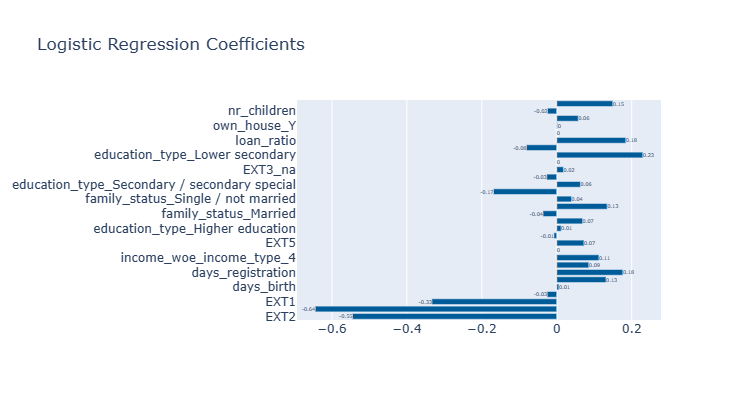

In [105]:
# Refit selected model
model1 = LogisticRegression(**model_dict["logistic"].best_params_)
model1.fit(X_1, y_1)

# Display Model Coefficients
fig = go.Figure([
    go.Bar(y=X_train.columns, x=model1.coef_[0], text=np.round(model1.coef_[0], 2), orientation='h')
    ])

fig.update_traces(textposition='outside', marker_color='rgb(0, 92, 153)')
fig.update_layout(title='Logistic Regression Coefficients',
                  dragmode='select',
                  width=700,
                  height=400,
                  hovermode='closest')
fig.show()

#### (b) Probability cutoff (75% default)

In [106]:
# original data
data_temp = {
    "X_train":X_train,
    "y_train":y_train,
    "X_valid":X_valid,
    "y_valid":y_valid,
}

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.25, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.7439	F1: 0.2687
valid:  AUC: 0.7582	F1: 0.2619
          pred:no  pred:yes
true:no      2343      1064
true:yes       97       206


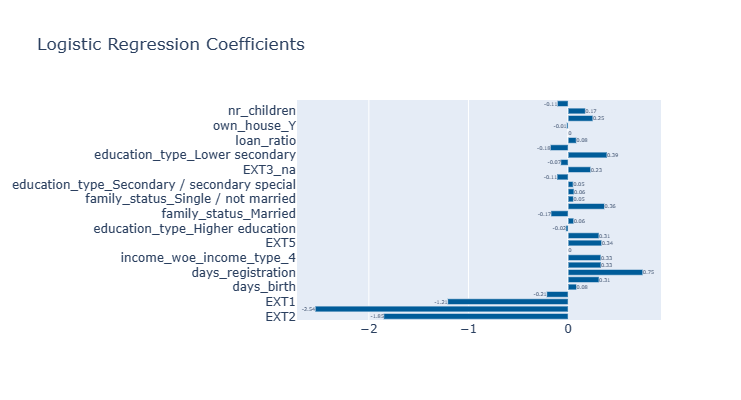

In [107]:
# Refit selected model
model2 = LogisticRegression(**model_dict["logistic"].best_params_)
model2.fit(X_train, y_train)

# Display Model Coefficients
fig = go.Figure([
    go.Bar(y=X_train.columns, x=model2.coef_[0], text=np.round(model2.coef_[0], 2), orientation='h')
    ])

fig.update_traces(textposition='outside', marker_color='rgb(0, 92, 153)')
fig.update_layout(title='Logistic Regression Coefficients',
                  dragmode='select',
                  width=700,
                  height=400,
                  hovermode='closest')
fig.show()

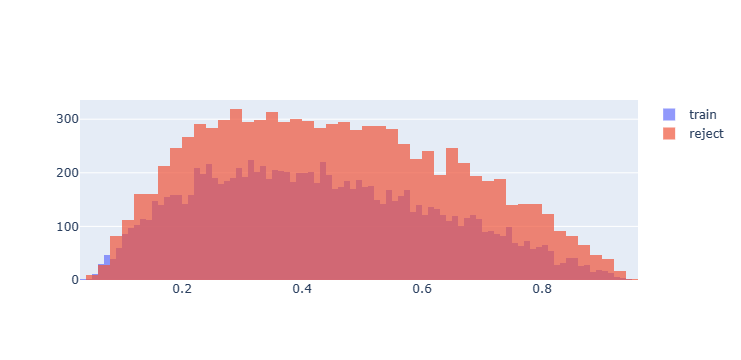

In [110]:
# get probabilities
pred_train = pd.DataFrame(model2.predict_proba(X_train))[1]
pred_reject = pd.DataFrame(model2.predict_proba(reject))[1]

# display probability distribution
fig = go.Figure()
fig.add_trace(go.Histogram(x=pred_train, name='train'))
fig.add_trace(go.Histogram(x=pred_reject, name='reject'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show()

In [111]:
# Label rejects based on cutoff

# Define 15% cutoff
cutoff_15 = int(len(pred_reject) * 0.15)

# Compute cutoff value
cutoff_value = np.max(np.sort(pred_reject)[:cutoff_15])
print("Cutoff probability: {:.3f}%".format(cutoff_value*100))

# Assign "Default" value to rejected loan applicants
y_reject = np.array(pred_reject > cutoff_value, dtype=int)

Cutoff probability: 22.595%


In [112]:
# Incorporate labelled rejects with accepts

X_2 = pd.concat([X_train, reject], axis=0).reset_index(drop=True)
y_2 = np.append(y_train, y_reject)

data_temp = {
    "X_train":X_2,
    "y_train":y_2,
    "X_valid":X_valid,
    "y_valid":y_valid,
}

# Run GridSearch and print best parameters

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.25, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.6895	F1: 0.5869
valid:  AUC: 0.7532	F1: 0.2348
          pred:no  pred:yes
true:no      1973      1434
true:yes       72       231


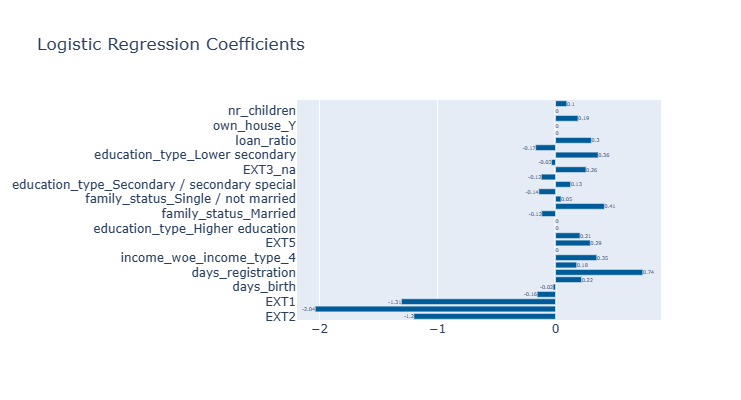

In [113]:
# Refit selected model
model3 = LogisticRegression(**model_dict["logistic"].best_params_)
model3.fit(X_2, y_2)

# Display Model Coefficients
fig = go.Figure([
    go.Bar(y=X_train.columns, x=model3.coef_[0], text=np.round(model3.coef_[0], 2), orientation='h')
    ])

fig.update_traces(textposition='outside', marker_color='rgb(0, 92, 153)')
fig.update_layout(title='Logistic Regression Coefficients',
                  dragmode='select',
                  width=700,
                  height=400,
                  hovermode='closest')
fig.show()

#### (c) Probability > 0.5 = default

In [114]:
# Incorporate labelled rejects with accepts

X_3 = pd.concat([X_train, reject], axis=0).reset_index(drop=True)
y_3 = np.append(y_train, np.round(pred_reject))

data_temp = {
    "X_train":X_3,
    "y_train":y_3,
    "X_valid":X_valid,
    "y_valid":y_valid,
}

# Run GridSearch and print best parameters

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.25, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.8827	F1: 0.6977
valid:  AUC: 0.7580	F1: 0.2721
          pred:no  pred:yes
true:no      2440       967
true:yes      103       200


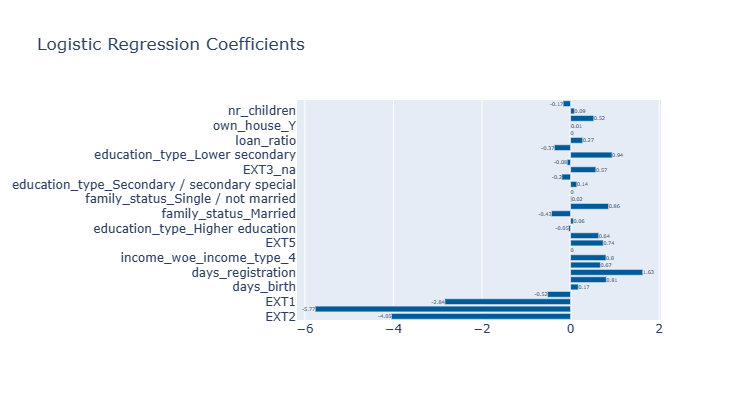

In [115]:
# Refit selected model
model4 = LogisticRegression(**model_dict["logistic"].best_params_)
model4.fit(X_3, y_3)

# Display Model Coefficients
fig = go.Figure([
    go.Bar(y=X_train.columns, x=model4.coef_[0], text=np.round(model4.coef_[0], 2), orientation='h')
    ])

fig.update_traces(textposition='outside', marker_color='rgb(0, 92, 153)')
fig.update_layout(title='Logistic Regression Coefficients',
                  dragmode='select',
                  width=700,
                  height=400,
                  hovermode='closest')
fig.show()

In [116]:
model_overview = {
    "All default": model1,
    "Cutoff": model3,
    "Proba": model4
}

In [117]:
res_dict = defaultdict()

for name, model in model_overview.items():

    #Predict values for test set
    proba_test   = model.predict_proba(X_test)[:,1]

    #compute evaluation metrics
    res_dict[name] = eval_metrics(proba_test, y_test)
    res_dict[name]["params"] = model.get_params()

# display overview
pd.DataFrame(res_dict).T.sort_values("AUC", ascending=False)

AUC        F1  \
Proba        0.752318   0.28382   
Cutoff        0.75037  0.241362   
All default  0.747017  0.243974   

                                                        params  
Proba        {'C': 0.25, 'class_weight': 'balanced', 'dual'...  
Cutoff       {'C': 0.25, 'class_weight': 'balanced', 'dual'...  
All default  {'C': 0.5, 'class_weight': 'balanced', 'dual':...

According to the table above, Proba method gives the best result in terms of AUC, which is 0.752.

In [121]:
# Create a coefficients df
array = model4.coef_[0]
index_values = X_train.columns
column_values = ['coefficients']

df = pd.DataFrame(data = array, 
                  index = index_values, 
                  columns = column_values)
df = df.reset_index()
df1 = df[df['coefficients'] != 0]
df1

index  coefficients
0                                           EXT2     -4.046850
1                                           EXT3     -5.767076
2                                           EXT1     -2.839953
3                    occup_woe_occupation_type_3     -0.520731
4                                     days_birth      0.173784
5                              days_phone_change      0.807268
6                              days_registration      1.630945
7                    occup_woe_occupation_type_2      0.673776
8                       income_woe_income_type_4      0.799114
10                                          EXT5      0.736393
11                                 days_employed      0.635178
12               education_type_Higher education     -0.046709
13                                   loan_amount      0.063713
14                         family_status_Married     -0.430999
15                                       EXT1_na      0.858969
16            family_status_Single / not married      0.023972
18  education_type_Secondary / secondary special      0.141653
19                                  phone_number     -0.196855
20                                       EXT3_na      0.571156
21                    housing_woe_housing_type_3     -0.077219
22                education_type_Lower secondary      0.937620
23                                     own_car_Y     -0.366915
24                                    loan_ratio      0.274033
26                                   own_house_Y      0.006672
27                                         email      0.524383
28                                   nr_children      0.085380
29                                 interest_rate     -0.168578

In [ ]:
#pip install lime

In [122]:
import lime
from lime import lime_tabular

In [124]:
# Create a Numpy array format for training data
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['default', 'non-default'],
    mode='classification'
)

In [128]:
# Model explaination
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=model4.predict_proba
)

exp.show_in_notebook(show_table=True)

C:\Users\hnguyetnguyen\.conda\envs\py\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



**Interpret the model**
- Lower secondary education, occupation type 2 (cooking staff, security staff, barmen staff, realty agents, low-skill laborers, drivers, hr staff, secretaries) clients have a higher probability to default
- The larger the EXT2, EXT1, the less likely that the clients will default
- Clients with income type 4 (working, commercial associate) have lower probability to default
- Clients who did not specify the EXT1 and EXT3 variables tend to not default
- The longer the changing days of registration before application, the lower the probability that he/she will default

### 3.3 Application Scorecard

In [129]:
# Define the function to calculate the score
def score_func(logit, params, intercept, target=900, target_odds=50, pdo=20):
    """
    Data-driven application scoring function.
    Inspired by: https://blogs.sas.com/content/subconsciousmusings/2019/01/18/building-credit-scorecards-using-statistical-methods-and-business-logic/
    """
    
    factor = pdo / np.log(2)
    offset = target - factor * np.log(target_odds)

    # regression model predicts default, therefore: factor*logit is deducted from offset
    score  = offset/params - factor * (logit + intercept/params)
    
    return score

In [130]:
# get model intercept
ic = model_overview["Proba"].intercept_.item()

# compute log odds (coef * value)
df_logit = X_test * model_overview["Proba"].coef_

# compute score for all applicants
df_score = score_func(df_logit, df_logit.shape[1], ic)

# compute row sums (total score per applicant) and sort values
sum_sort = np.sort(np.sum(df_score, axis=1))

In [169]:
df_score

EXT2        EXT3       EXT1  occup_woe_occupation_type_3  \
0      40.456010  105.284220  57.185584                    38.198655   
1      64.367927  118.263097  66.138345                    23.173521   
2      85.841587   99.998648  66.138345                    38.198655   
3     134.788119   89.163964  39.327472                    23.173521   
4      51.636939  120.780764  44.133581                    23.173521   
...          ...         ...        ...                          ...   
3705  120.578796  143.066265  66.138345                    38.198655   
3706  128.879430  106.953092  66.138345                    38.198655   
3707  101.362621  107.622483  57.517844                    23.173521   
3708  116.845546  134.765919  66.138345                    38.198655   
3709  134.723158  171.903959  66.138345                    38.198655   

      days_birth  days_phone_change  days_registration  \
0      19.720141           3.067897         -15.044383   
1      18.918571           6.165793         -19.901508   
2      20.267435          -0.119307         -14.222000   
3      20.352959           9.587434         -10.975877   
4      18.624403           2.777644         -19.358879   
...          ...                ...                ...   
3705   20.186504          10.223758         -10.076320   
3706   23.030312           9.330671          -2.414411   
3707   21.611995          -0.119307         -15.468838   
3708   21.100001           4.491255         -17.501885   
3709   21.519010           1.862230          -6.412977   

      occup_woe_occupation_type_2  income_woe_income_type_4  \
0                       23.173521                 23.173521   
1                       23.173521                  0.115971   
2                       23.173521                  0.115971   
3                       23.173521                  0.115971   
4                       23.173521                  0.115971   
...                           ...                       ...   
3705                    23.173521                 23.173521   
3706                    23.173521                 23.173521   
3707                     3.732453                  0.115971   
3708                    23.173521                 23.173521   
3709                    23.173521                  0.115971   

      income_woe_income_type_3       EXT5  days_employed  \
0                    23.173521   1.925720      22.397032   
1                    23.173521   1.925720      22.430867   
2                    23.173521   1.925720      22.412224   
3                    23.173521   1.925720      22.465517   
4                    23.173521   1.925720      22.362094   
...                        ...        ...            ...   
3705                 23.173521   1.925720      22.476157   
3706                 23.173521  23.173521       4.846164   
3707                 23.173521   1.925720      22.407623   
3708                 23.173521  23.173521       4.846164   
3709                 23.173521   1.925720      22.672460   

      education_type_Higher education  loan_amount  family_status_Married  \
0                           23.173521    22.650341              35.609520   
1                           23.173521    22.506336              35.609520   
2                           23.173521    23.081072              23.173521   
3                           23.173521    22.337916              35.609520   
4                           23.173521    22.997686              23.173521   
...                               ...          ...                    ...   
3705                        23.173521    23.055166              35.609520   
3706                        24.521272    23.017774              23.173521   
3707                        23.173521    23.017375              23.173521   
3708                        23.173521    22.625063              35.609520   
3709                        23.173521    22.949913              23.173521   

        EXT1_na  family_status_Single / not mar

The code for visualizations below are taken from: https://github.com/aviolante/sas-python-work/blob/09c5fb71d39de6cfb7f57ec3a445c401e024d9a8/machine_learning/scorecard_post/credit_scorecard_demo_public.ipynb

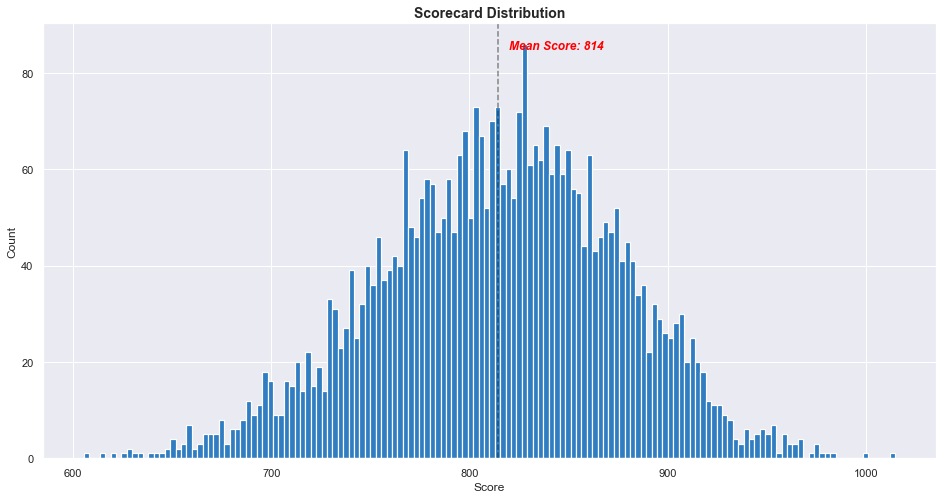

In [135]:
# Plot Distribution of Scores
plt.figure(figsize=(16,8))

plt.hist(sum_sort,
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=14)
plt.axvline(sum_sort.mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.text(820, 85, 'Mean Score: 814', color='red', fontweight='bold', style='italic', fontsize=12)
plt.xlabel('Score')
plt.ylabel('Count');

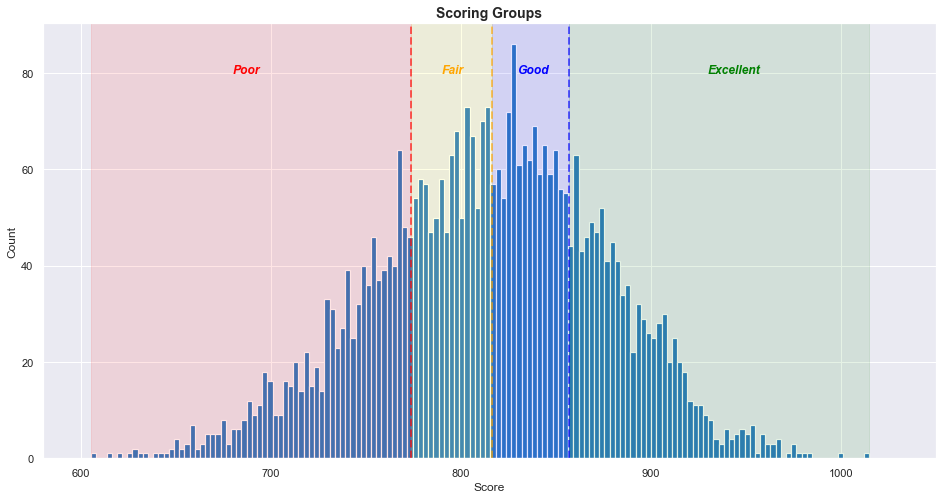

In [134]:
# Add Scoring Groups to Plot
plt.figure(figsize=(16,8))

plt.hist(sum_sort,
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

plt.xlim(580, 1050)
plt.title('Scoring Groups', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

# Percentile Lines
plt.axvline(np.percentile(sum_sort,25), color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(sum_sort,50), color='orange', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(sum_sort,75), color='blue', linestyle='dashed', linewidth=2, alpha=0.6)

# Text
plt.text(680, 80, 'Poor', color='red', fontweight='bold', style='italic', fontsize=12)
plt.text(790, 80, 'Fair', color='orange', fontweight='bold', style='italic', fontsize=12)
plt.text(830, 80, 'Good', color='blue', fontweight='bold', style='italic', fontsize=12)
plt.text(930, 80, 'Excellent', color='green', fontweight='bold', style='italic', fontsize=12)

# Shading between Percentiles
plt.axvspan(sum_sort.min(), np.percentile(sum_sort,25), alpha=0.1, color='red')
plt.axvspan(np.percentile(sum_sort,25), np.percentile(sum_sort,50), alpha=0.1, color='yellow')
plt.axvspan(np.percentile(sum_sort,50), np.percentile(sum_sort,75), alpha=0.1, color='blue')
plt.axvspan(np.percentile(sum_sort,75), sum_sort.max(), alpha=0.1, color='green')
plt.show()

Regarding the histogram, and consider some knowledge in variable contrbutions, the score of the customers are divided into 4 categories:
- Poor: 600 - 760
- Fair: 760 - 820
- Good: 820 - 850
- Excellent: 850 - 1000

Reference:
- Statiscal and machine learning pipeline jupyter notebook - Minh Phan
- Reject Inference, Survival Analysis jupyter notebook - Philipp Borchert
- https://towardsdatascience.com/lime-how-to-interpret-machine-learning-models-with-python-94b0e7e4432e
- https://github.com/aviolante/sas-python-work/blob/09c5fb71d39de6cfb7f57ec3a445c401e024d9a8/machine_learning/scorecard_post/credit_scorecard_demo_public.ipynb